In [2]:

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cv2, os, random
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot

import glob
import tensorflow
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm
from termcolor import colored
import albumentations as A

from warnings import filterwarnings
filterwarnings("ignore")

from sklearn import set_config
set_config(print_changed_only = False)
directory = "../input/chest-xray-pneumonia/chest_xray/"


In [3]:
print("Current tensorflow version == {}".format(tensorflow. __version__))

Current tensorflow version == 2.15.0


In [4]:

train_df = glob.glob("../input/chest-xray-pneumonia/chest_xray/train/**/*.jpeg")
test_df = glob.glob("../input/chest-xray-pneumonia/chest_xray/test/**/*.jpeg")
validation_df = glob.glob("../input/chest-xray-pneumonia/chest_xray/val/**/*.jpeg")


In [5]:
train_df[:5], test_df[:5]

(['../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1180_virus_2010.jpeg',
  '../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1230_virus_2081.jpeg',
  '../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1513_virus_2632.jpeg',
  '../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person124_virus_238.jpeg',
  '../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person746_virus_1369.jpeg'],
 ['../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1676_virus_2892.jpeg',
  '../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1650_virus_2852.jpeg',
  '../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person22_virus_55.jpeg',
  '../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person122_bacteria_582.jpeg',
  '../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person85_bacteria_417.jpeg'])

In [7]:
print("There is {} images in the training dataset".format(len(train_df)))
print("There is {} images in the test dataset".format(len(test_df)))
print("There is {} images in the validation dataset".format(len(validation_df)))

There is 5216 images in the training dataset
There is 624 images in the test dataset
There is 16 images in the validation dataset


In [8]:
datasets, pneumonia_lung, normal_lung = ["train", "test", "val"], [], []

for i in datasets:
    path = os.path.join(directory, i)
    normal = glob.glob(os.path.join(path, "NORMAL/*.jpeg"))
    pneumonia = glob.glob(os.path.join(path, "PNEUMONIA/*.jpeg"))
    normal_lung.extend(normal), pneumonia_lung.extend(pneumonia)

print("pneumonia images {}".format(len(pneumonia_lung)))
print("non-pneumonia images {}".format(len(normal_lung)))

pneumonia images 4273
non-pneumonia images 1583


In [9]:
random.shuffle(normal_lung)
random.shuffle(pneumonia_lung)
images = normal_lung[:50] + pneumonia_lung[:50]
images[:10]

['../input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0908-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1301-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0899-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0630-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0427-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0551-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0304-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0705-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0842-0001.jpeg',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0501-0001-0001.jpeg']

NORMAL


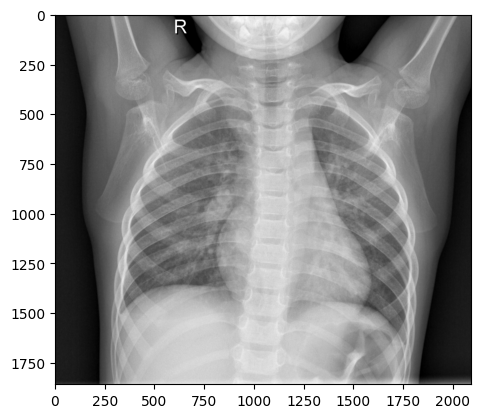

In [10]:
normal_lung_image = load_img("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg")
print("NORMAL")
plt.imshow(normal_lung_image)
plt.show()

PNEUMONIA


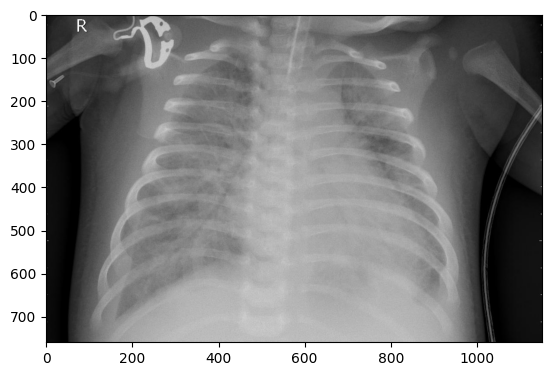

In [11]:
normal_lung_image = load_img("/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg")
print("PNEUMONIA")
plt.imshow(normal_lung_image)
plt.show()

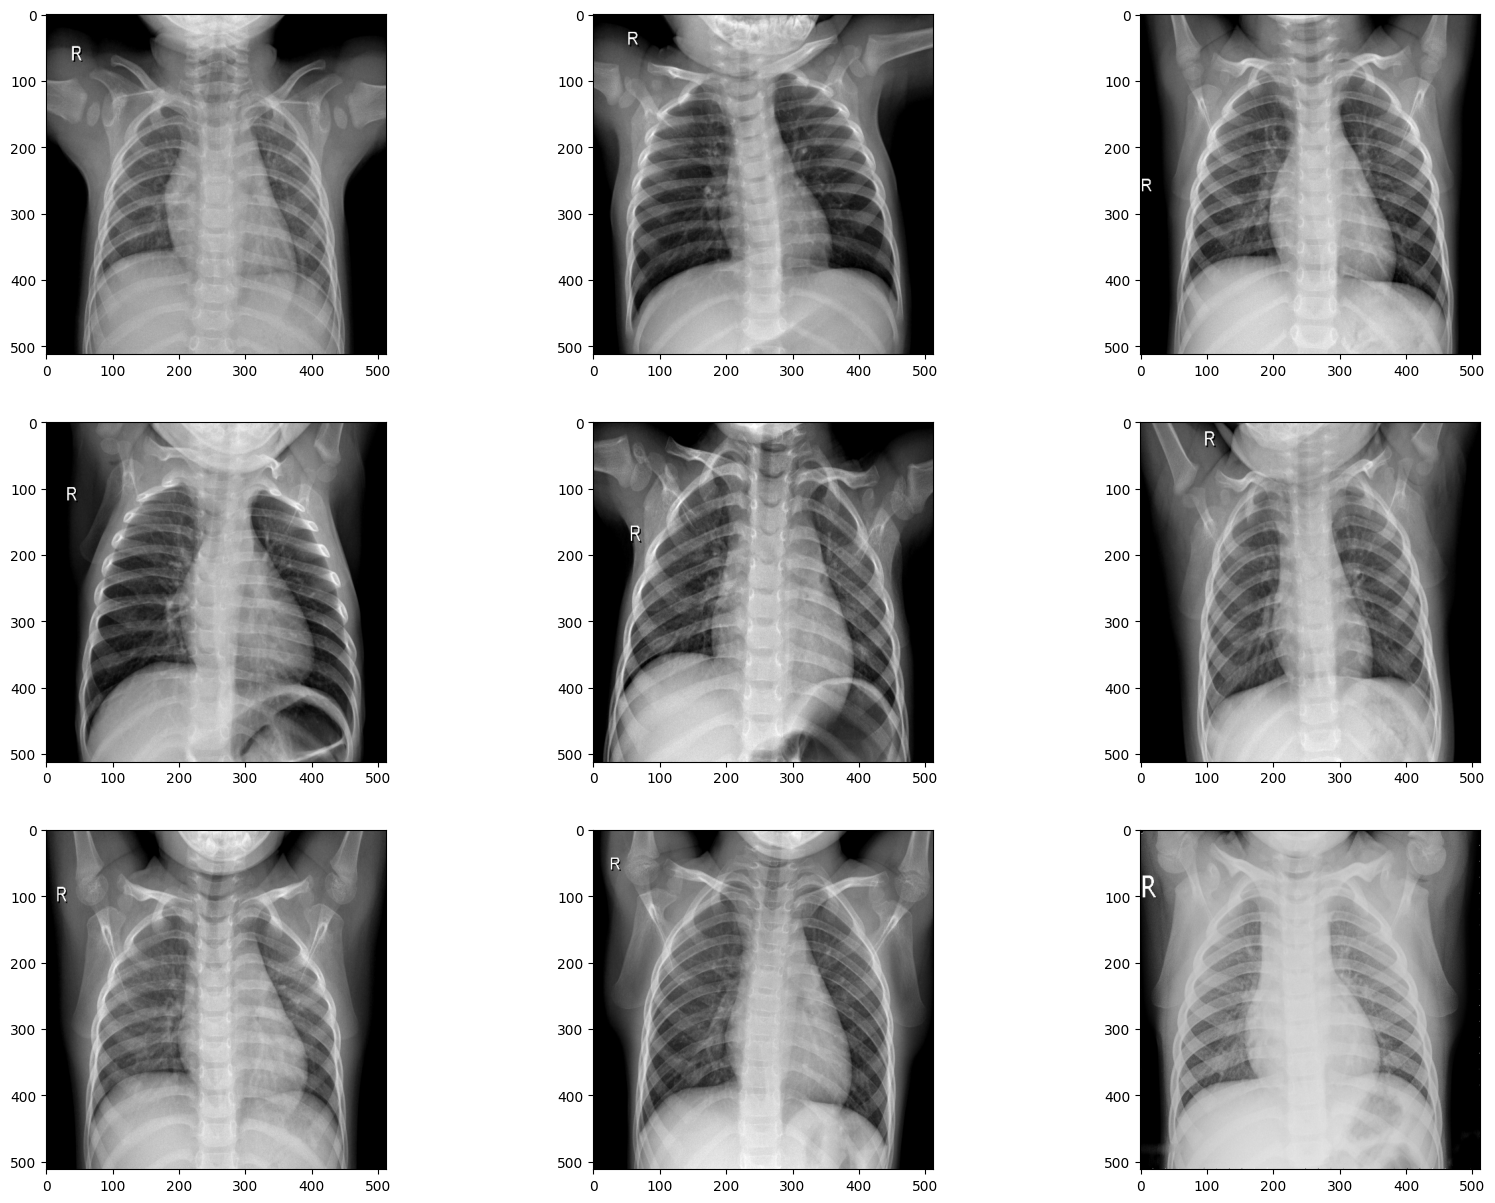

In [11]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3
for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)

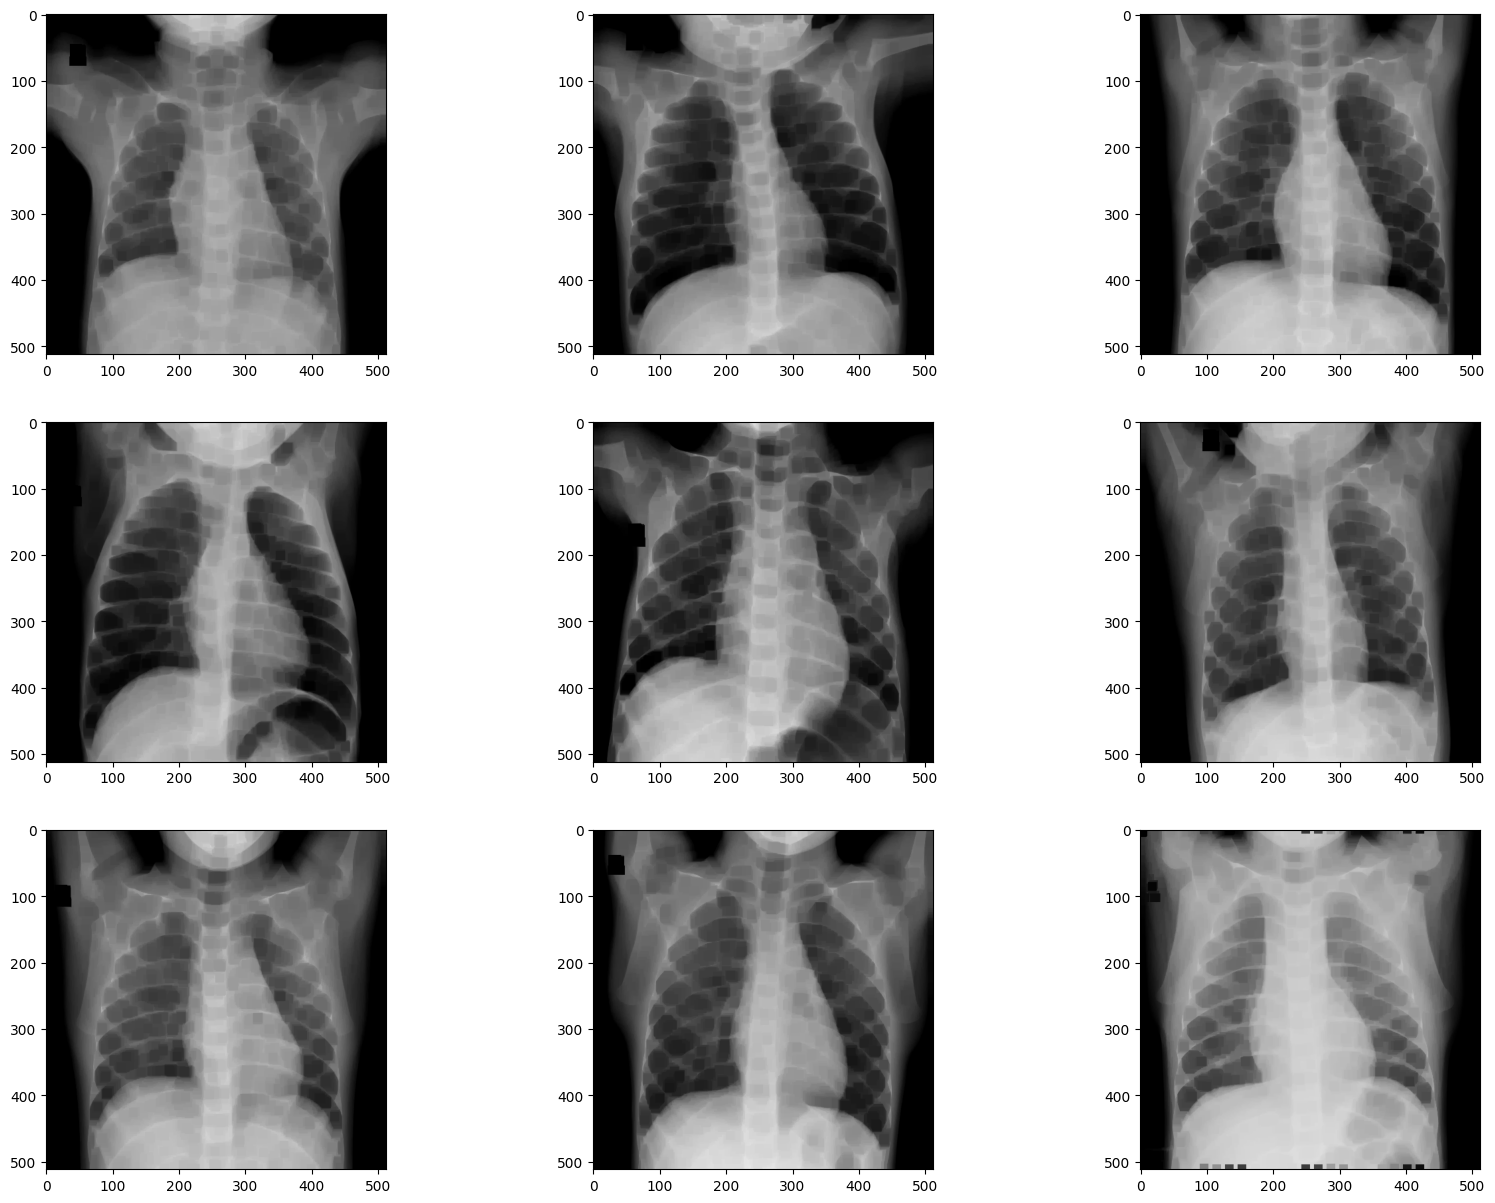

In [12]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3
for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    image_erosion = cv2.erode(img, kernel, iterations=3)
    fig.add_subplot(rows, columns, i)
    plt.imshow(image_erosion)

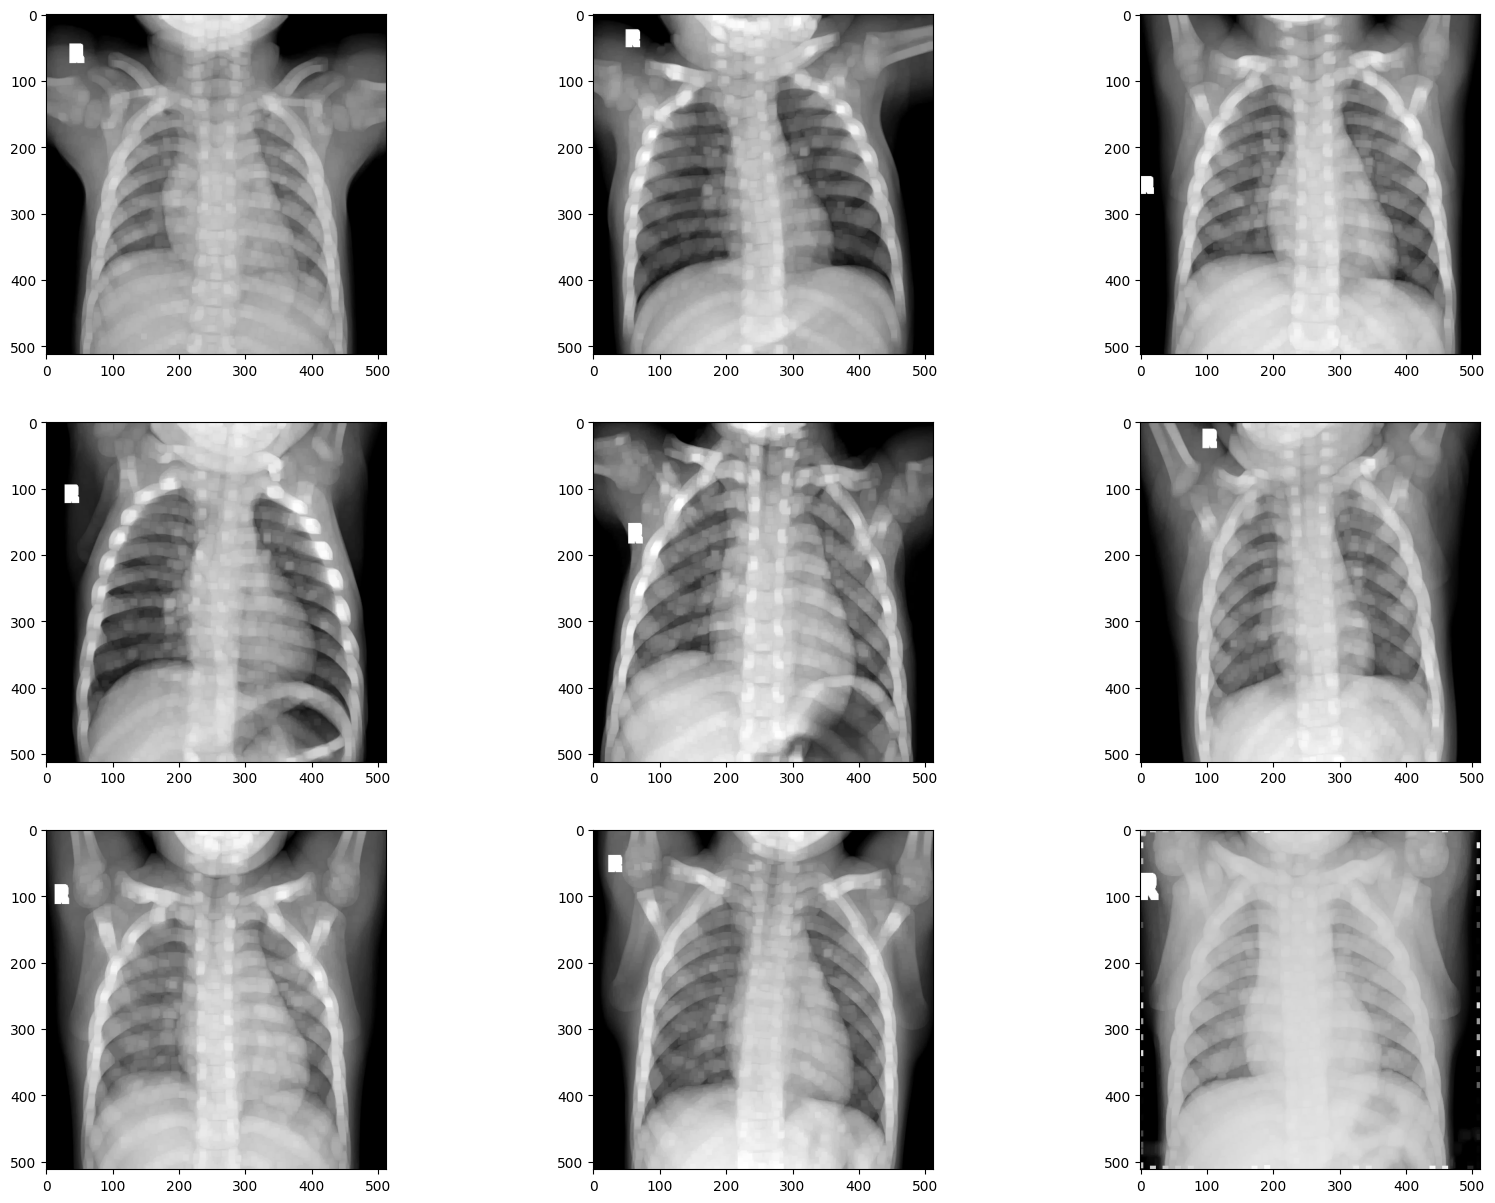

In [13]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3

for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    image_dilation = cv2.dilate(img, kernel, iterations = 2)
    fig.add_subplot(rows, columns, i)
    plt.imshow(image_dilation)

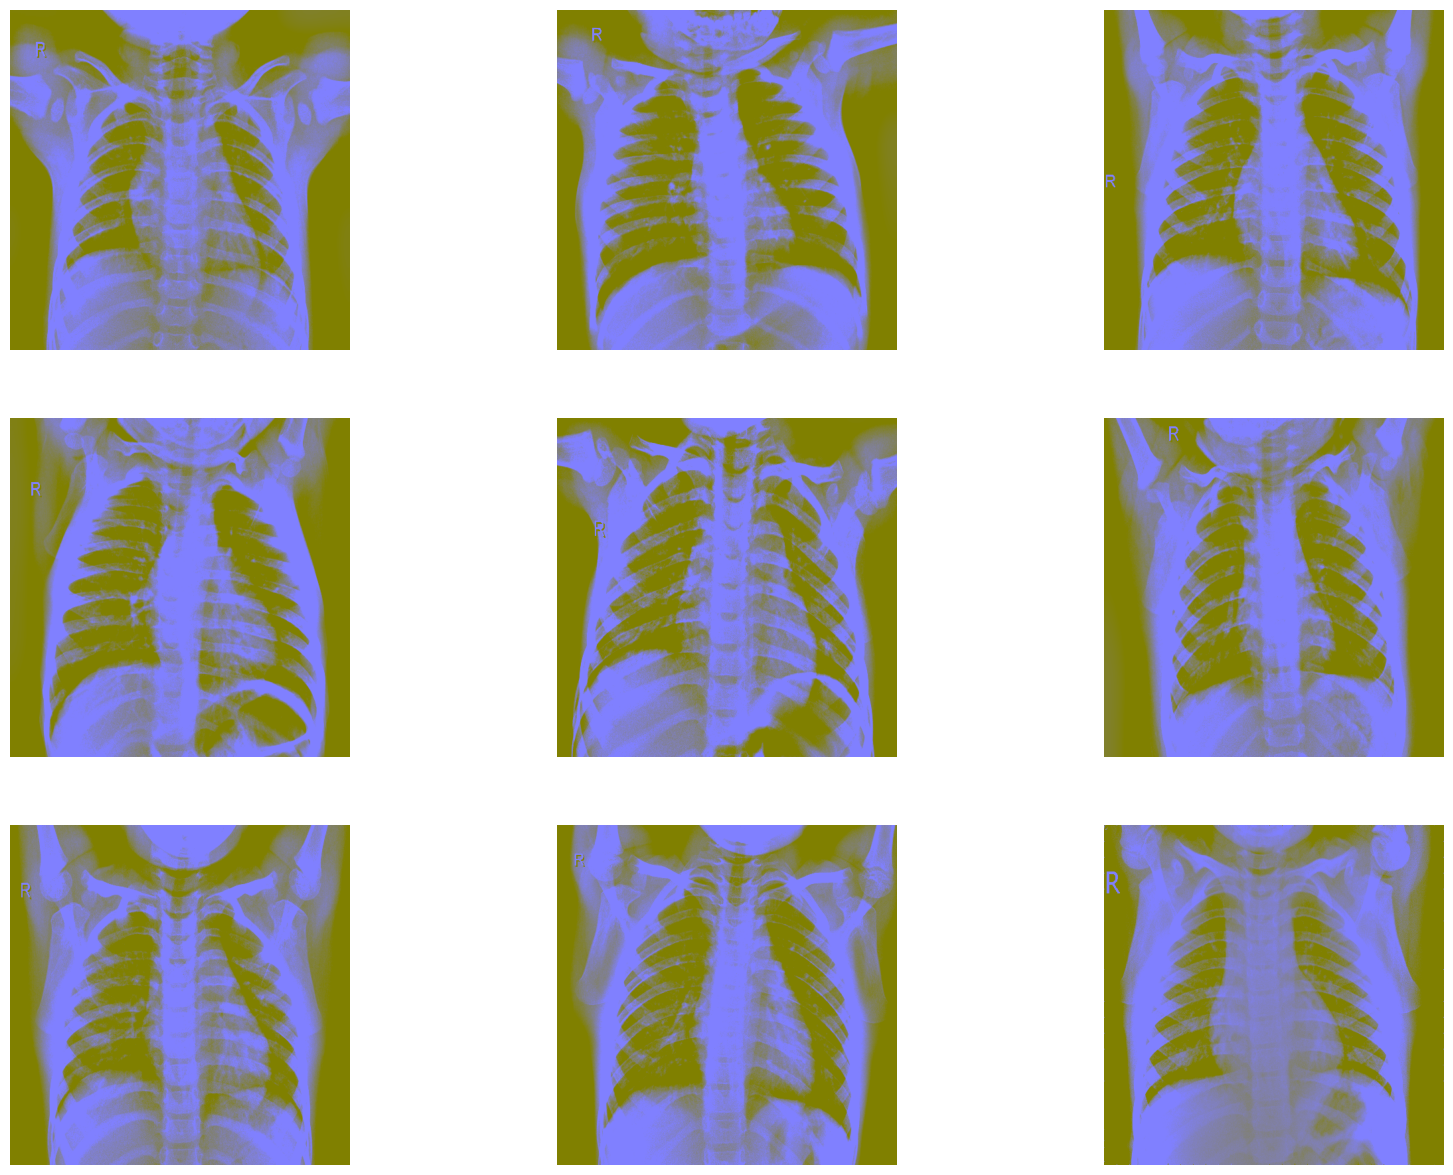

In [14]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3

for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0, 0), 512/10), -4, 128)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis(False)

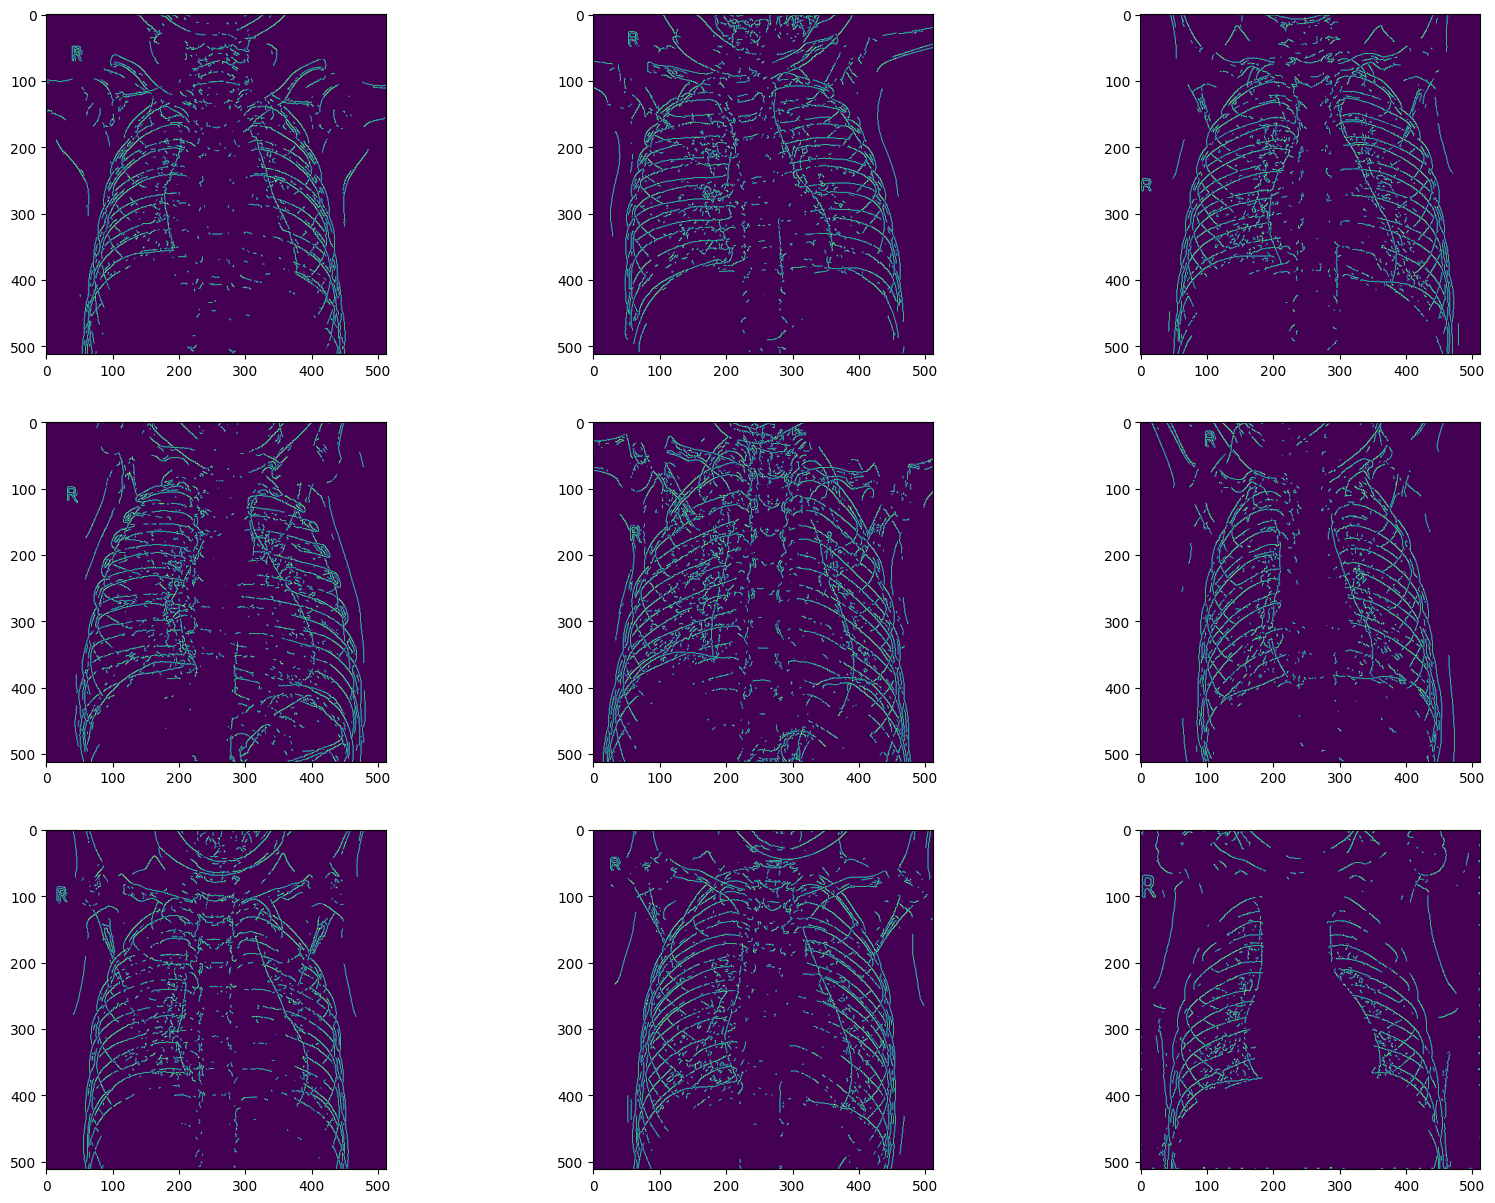

In [15]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3

for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    detected_edges = cv2.Canny(img, 80, 100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(detected_edges)

In [4]:
train_dir = "../input/chest-xray-pneumonia/chest_xray/train"
test_dir = "../input/chest-xray-pneumonia/chest_xray/test"
validation_dir = "../input/chest-xray-pneumonia/chest_xray/val"

In [36]:
# import cv2
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# import cv2
# import numpy as np

# def custom_preprocessing(img):
#     # Ensure img is a float type (it should be, if coming directly from ImageDataGenerator with rescale)
#     if img.dtype != np.float32:
#         img = img.astype(np.float32)
    
#     # Convert to grayscale
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     # Convert image to uint8
#     img = (img * 255).astype(np.uint8)  # scale float image to uint8, as Canny requires uint8

#     # Apply Gaussian blur
#     img = cv2.GaussianBlur(img, (5, 5), 0)
    
#     # Edge detection using Canny
#     img = cv2.Canny(img, 100, 200)
    
#     # Convert back to three channels (to fit the expected input of most CNNs)
#     img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
#     # Rescale the final image (optional, if not handled by ImageDataGenerator)
#     img = img.astype(np.float32) / 255.0
    
#     return img



# def additional_processing(img):
#     # Erosion and Dilation
#     kernel = np.ones((3, 3), np.uint8)
#     img = cv2.erode(img, kernel, iterations=1)
#     img = cv2.dilate(img, kernel, iterations=1)
#     return img

**model 3**

In [160]:
# import cv2
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# def custom_preprocessing(img):
#     # Ensure img is a float type if it's coming from an image data generator with rescale
#     if img.dtype != np.float32:
#         img = img.astype(np.float32)
    
#     # Convert to RGB (if coming from cv2, images are loaded in BGR by default)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
#     # Convert image to uint8 for further processing with OpenCV functions
#     img = (img * 255).astype(np.uint8)

#     # Erosion
#     kernel = np.ones((5, 5), np.uint8)
#     img = cv2.erode(img, kernel, iterations=1)
    
#     # Dilation
#     img = cv2.dilate(img, kernel, iterations=1)
    
#     # Apply Gaussian blur
#     img = cv2.GaussianBlur(img, (5, 5), 0)
    
#     # Edge detection using Canny
#     img = cv2.Canny(img, 100, 200)
    
#     # Convert the Canny edge output back to three channels (to fit the expected input of most CNNs)
#     img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
#     # Rescale the final image (optional, if not handled by ImageDataGenerator)
#     img = img.astype(np.float32) / 255.0
    
#     return img




# def additional_processing(img):
#     # Erosion and Dilation
#     kernel = np.ones((3, 3), np.uint8)
#     img = cv2.erode(img, kernel, iterations=1)
#     img = cv2.dilate(img, kernel, iterations=1)
#     return img

In [91]:
# import cv2
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# def custom_preprocessing(img):
#     # Ensure img is a float type if it's coming from an image data generator with rescale
#     if img.dtype != np.float32:
#         img = img.astype(np.float32)
    
#     # Convert to RGB (if coming from cv2, images are loaded in BGR by default)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
#     # Convert image to uint8 for further processing with OpenCV functions
#     img = (img * 255).astype(np.uint8)

#     # Erosion
#     kernel = np.ones((5, 5), np.uint8)
#     img = cv2.erode(img, kernel, iterations=3)
    
#     # Dilation
#     img = cv2.dilate(img, kernel, iterations=2)
    
#     # Apply Gaussian blur
#     img = cv2.GaussianBlur(img, (5, 5), 0)
    
#     # Edge detection using Canny
#     img = cv2.Canny(img, 80, 100)
    
#     # Convert the Canny edge output back to three channels (to fit the expected input of most CNNs)
#     img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
#     # Rescale the final image (optional, if not handled by ImageDataGenerator)
#     img = img.astype(np.float32) / 255.0
    
#     return img




# def additional_processing(img):
#     # Erosion and Dilation
#     kernel = np.ones((3, 3), np.uint8)
#     img = cv2.erode(img, kernel, iterations=1)
#     img = cv2.dilate(img, kernel, iterations=1)
#     return img

**USED for preprocessing**

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training image data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,  
    horizontal_flip=True,  
    vertical_flip=True,  
    rotation_range=30,  
    zca_whitening=True,  
    width_shift_range=0.25, 
    height_shift_range=0.25,  
    channel_shift_range=0.35,  
    shear_range=0.2, 
    zoom_range=0.4,  
    fill_mode='nearest', 
    brightness_range=[0.5, 1.5]
)

# Validation and test image data generator
val_test_datagen = ImageDataGenerator(
    rescale=1./255  # Normalize pixel values to [0,1]
)

# Directories setup
train_dir = "../input/chest-xray-pneumonia/chest_xray/train"
test_dir = "../input/chest-xray-pneumonia/chest_xray/test"
validation_dir = "../input/chest-xray-pneumonia/chest_xray/val"

# Create data generators
train_set = train_datagen.flow_from_directory(
    train_dir, 
    class_mode='binary', 
    batch_size=16, 
    target_size=(224, 224)
)

validation_set = val_test_datagen.flow_from_directory(
    validation_dir, 
    class_mode='binary', 
    batch_size=16, 
    target_size=(224, 224)
)

test_set = val_test_datagen.flow_from_directory(
    test_dir, 
    class_mode='binary', 
    batch_size=16, 
    target_size=(224, 224)
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


try


In [93]:
# train_datagen = ImageDataGenerator(
#     horizontal_flip=True,
#     vertical_flip=True,
#     rotation_range=30,
#     width_shift_range=0.25,
#     height_shift_range=0.25,
#     channel_shift_range=0.35,
#     shear_range=0.2,
#     zoom_range=0.4,
#     preprocessing_function=custom_preprocessing
# )

# val_test_datagen = ImageDataGenerator(
#     preprocessing_function=lambda x: x / 255.0  # simple rescale function for validation and test
# )


In [158]:
# train_set = train_datagen.flow_from_directory(train_dir, class_mode="binary", batch_size=16, target_size=(224, 224))
# validation_set = val_test_datagen.flow_from_directory(validation_dir, class_mode="binary", batch_size=16, target_size=(224, 224))
# test_set = val_test_datagen.flow_from_directory(test_dir, class_mode="binary", batch_size=16, target_size=(224, 224))

**model 5**

In [8]:
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
# )

# val_test_datagen = ImageDataGenerator(rescale=1./255)


In [159]:
# train_set = train_datagen.flow_from_directory(train_dir, class_mode="binary", batch_size=16, target_size=(224, 224))
# validation_set = val_test_datagen.flow_from_directory(validation_dir, class_mode="binary", batch_size=16, target_size=(224, 224))
# test_set = val_test_datagen.flow_from_directory(test_dir, class_mode="binary", batch_size=16, target_size=(224, 224))

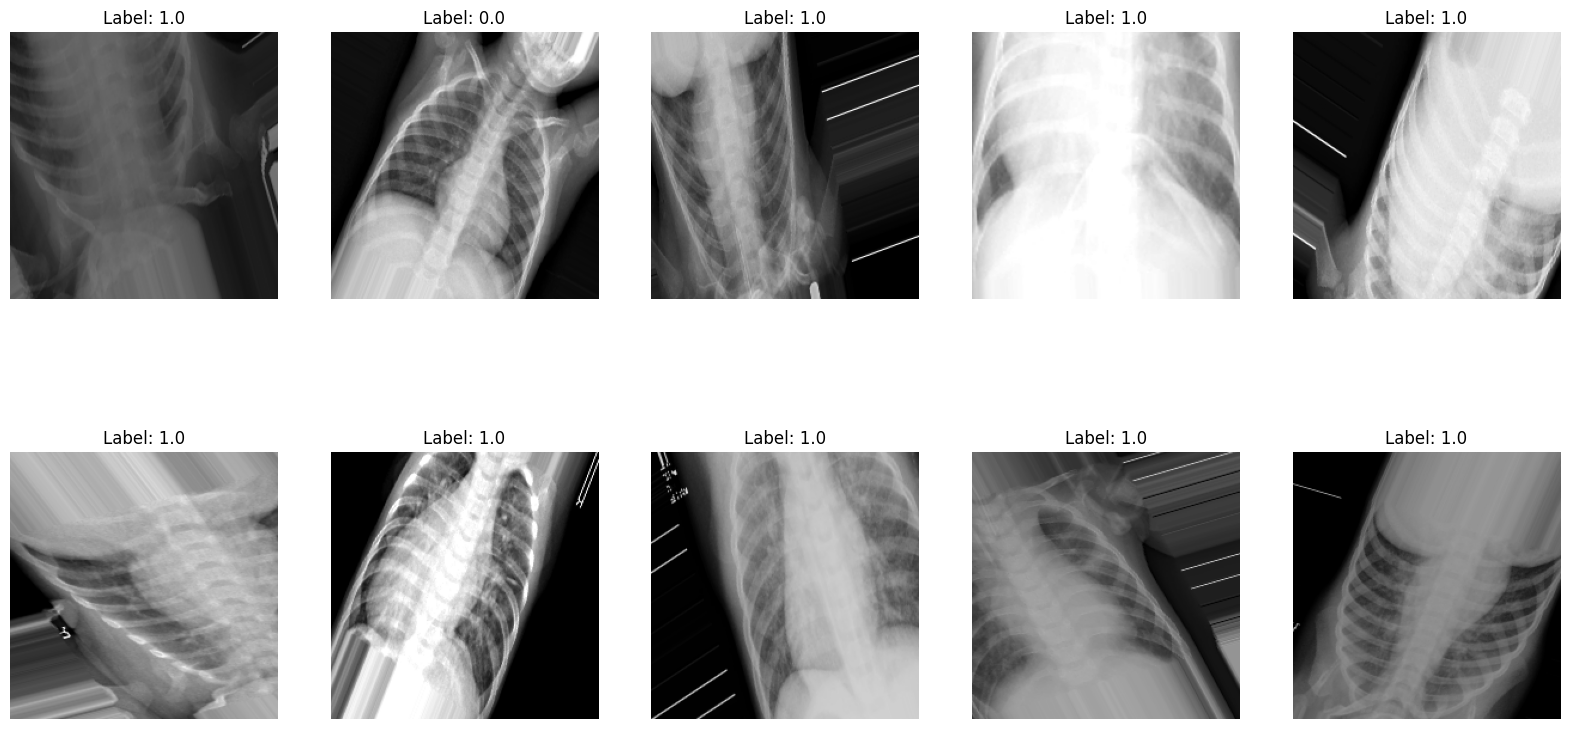

In [4]:
import matplotlib.pyplot as plt

# Fetch a batch of images and labels
images, labels = next(train_set)

# Create a grid plot with 10 images
plt.figure(figsize=(20, 10))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f'Label: {labels[i]}')
    plt.axis("off")

plt.show()


**model 1**

In [13]:
# train_datagen = ImageDataGenerator(
#             rescale = 1/255.,
#             horizontal_flip = True,
#             vertical_flip = True,
#             rotation_range = 0.3,
#             zca_whitening = True,
#             width_shift_range = 0.25,
#             height_shift_range = 0.25,
#             channel_shift_range = 0.35,
#             shear_range = 0.2,
#             zoom_range = 0.4)

# val_test_datagen = ImageDataGenerator(rescale = 1./255)

# train_set = train_datagen.flow_from_directory(train_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))
# validation_set = val_test_datagen.flow_from_directory(validation_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))
# test_set = val_test_datagen.flow_from_directory(test_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:
import tensorflow
from tensorflow.keras.callbacks import ReduceLROnPlateau
early_stopping_callbacks = tensorflow.keras.callbacks.EarlyStopping(patience = 15,
                                                                    restore_best_weights = True,
                                                                    verbose = 1)

**ResNet50V2**

In [14]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

weights_path = '/kaggle/input/data-resnet-50/resnet50v2_weights_tf_dim_ordering_tf_kernels_notop.h5'

base_model2 = ResNet50V2(weights=None,
                         input_shape=(224, 224, 3),
                         pooling="max",
                         include_top=False)

base_model2.load_weights(weights_path)

for layer in base_model2.layers:
    layer.trainable = False

In [16]:
model3 = Sequential()
model3.add(base_model2)
model3.add(Flatten())

model3.add(Dense(128, activation = "relu"))
model3.add(Dense(64, activation = "relu"))
model3.add(Dense(32, activation = "relu"))
model3.add(Dense(1, activation = "sigmoid"))

for layer in base_model2.layers:
    layer.trainable = False

model3.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [110]:
history = model3.fit(train_set, epochs = 10, validation_data = validation_set, steps_per_epoch = 100,callbacks = [early_stopping_callbacks])

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.7849 - loss: 0.6256 - val_accuracy: 0.8750 - val_loss: 0.3632
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.8832 - loss: 0.2653 - val_accuracy: 0.8750 - val_loss: 0.3996
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.8758 - loss: 0.2962 - val_accuracy: 0.8750 - val_loss: 0.3460
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 317ms/step - accuracy: 0.9355 - loss: 0.1669 - val_accuracy: 0.8750 - val_loss: 0.4868
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.9274 - loss: 0.1740 - val_accuracy: 0.7500 - val_loss: 0.6931
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.9063 - loss: 0.2238 - val_accuracy: 0.8750 - val_loss: 0.3642
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.9215 - loss: 0.2131 - val_accuracy: 0.8750 - val_loss: 0.3003
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 319ms/step - accuracy: 0.9464 - loss: 0.1587 - val_

In [155]:
# plt.figure(figsize = (10, 5))
# plt.title("Model accuracy")
# plt.plot(history.history["accuracy"], "go-")
# plt.plot(history.history["val_accuracy"], "ro-")
# plt.legend(["accuracy", "val_accuracy"])
# plt.show()

In [156]:
# plt.figure(figsize = (10, 5))
# plt.title("Model loss")
# plt.plot(history.history["loss"], "go-")
# plt.plot(history.history["val_loss"], "ro-")
# plt.legend(["loss", "val_loss"])
# plt.show()

In [157]:
# test_loss, test_accuracy = model3.evaluate(test_set, steps = 50)
# print("The testing accuracy is: ", test_accuracy * 100, "%")
# print("The testing loss is: ", test_loss * 100, "%")

In [16]:
train_features = base_model2.predict(train_set, verbose=1)
train_labels = train_set.classes  

326/326 ━━━━━━━━━━━━━━━━━━━━ 103s 315ms/step


In [17]:
test_features = base_model2.predict(test_set, verbose=1)
test_labels = test_set.classes 


39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step


In [154]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# # Assuming train_features, train_labels, test_features, test_labels are already defined

# # Define the base estimator
# # We use a Decision Tree with max_depth=6, similar to the 'max_depth' used in your XGBoost example
# base_estimator = DecisionTreeClassifier(max_depth=6)

# # Create the AdaBoost classifier
# # n_estimators corresponds to num_boost_rounds in your XGBoost code
# # Learning rate 'eta' in XGBoost is similar to 'learning_rate' in AdaBoost
# ada_boost = AdaBoostClassifier(
#     base_estimator=base_estimator,
#     n_estimators=100,
#     learning_rate=0.1,
#     random_state=42
# )

# # Fit the model on the training data
# ada_boost.fit(train_features, train_labels)

# # Predict the test set
# test_predictions = ada_boost.predict(test_features)

# # Calculate the accuracy of the model
# test_accuracy = accuracy_score(test_labels, test_predictions)
# print("Test Accuracy:", test_accuracy)


In [153]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score

# dtrain = xgb.DMatrix(train_features, label=train_labels)
# dtest = xgb.DMatrix(test_features)

# params = {
#     'objective': 'binary:logistic',  
#     'booster': 'gbtree',
#     'eval_metric': 'logloss',
#     'eta': 0.1, 
#     'max_depth': 6,  
#     'subsample': 0.8,  
#     'colsample_bytree': 0.8,  
#     'n_estimators': 100 
# }

# num_rounds = 100
# gbm_model = xgb.train(params, dtrain, num_boost_round=num_rounds)

# test_predictions_proba = gbm_model.predict(dtest)
# test_predictions = (test_predictions_proba > 0.5).astype(int)

# test_accuracy = accuracy_score(test_labels, test_predictions)
# print("Test Accuracy:", test_accuracy)


In [152]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report, accuracy_score

# # Prepare lists to store results
# max_depths = range(1, 22)
# train_accuracies = []
# test_accuracies = []

# for depth in max_depths:
#     clf = DecisionTreeClassifier(max_depth=depth)
#     clf.fit(train_features, train_labels)

#     train_predictions = clf.predict(train_features)
#     test_predictions = clf.predict(test_features)

#     train_accuracy = accuracy_score(train_labels, train_predictions)
#     test_accuracy = accuracy_score(test_labels, test_predictions)

#     train_accuracies.append(train_accuracy)
#     test_accuracies.append(test_accuracy)

#     print(f"Max Depth: {depth}")
#     print("Training Accuracy:", train_accuracy)
#     print("Testing Accuracy:", test_accuracy)
#     print()  # Adds an empty line for better readability between results


In [151]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report, accuracy_score

# clf = DecisionTreeClassifier(max_depth=6)

# clf.fit(train_features, train_labels)

# train_predictions = clf.predict(train_features)
# test_predictions = clf.predict(test_features)

# train_accuracy = accuracy_score(train_labels, train_predictions)
# test_accuracy = accuracy_score(test_labels, test_predictions)

# print("Training Accuracy:", train_accuracy)
# print("Testing Accuracy:", test_accuracy)

# print("\nClassification Report (Test Data):")
# print(classification_report(test_labels, test_predictions))


In [150]:
# from sklearn.ensemble import RandomForestClassifier

# rf_clf = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42)
# rf_clf.fit(train_features, train_labels)
# rf_predictions = rf_clf.predict(test_features)
# rf_accuracy = accuracy_score(test_labels, rf_predictions)
# print("Random Forest Testing Accuracy:", rf_accuracy)

**ANN**

In [149]:
# import numpy as np
# from tensorflow import keras
# from tensorflow.keras import layers

# train_labels = keras.utils.to_categorical(train_set.classes, num_classes=2)
# test_labels = keras.utils.to_categorical(test_set.classes, num_classes=2)

# model = keras.Sequential([
#     layers.Input(shape=(train_features.shape[1],)),  
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.9),
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.9),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(2, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Implementing a callback for early stopping to avoid overfitting
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=10,
#     min_delta=0.001,
#     restore_best_weights=True,
# )

# model.fit(train_features, train_labels, epochs=50, batch_size=32, verbose=1,  # Increased epochs and adjusted batch size
#           callbacks=[early_stopping])

# test_loss, test_acc = model.evaluate(test_features, test_labels, verbose=1)
# print("Test accuracy:", test_acc)


In [89]:
# import lightgbm as lgb
# from sklearn.metrics import accuracy_score

# dtrain = lgb.Dataset(train_features, label=train_labels)
# dtest = lgb.Dataset(test_features, label=test_labels)

# params = {
#     'boosting_type': 'gbdt',     
#     'objective': 'binary',        
#     'metric': 'binary_logloss',  
#     'learning_rate': 0.1,         
#     'num_leaves': 25,             
#     'max_depth': 6,              
#     'subsample': 0.8,             
#     'colsample_bytree': 0.8,      
#     'n_estimators': 100,
#     'is_unbalance': True          
# }

# callbacks = [lgb.early_stopping(stopping_rounds=10)]

# gbm = lgb.train(params, dtrain, num_boost_round=100, valid_sets=[dtest], callbacks=callbacks)

# test_predictions_proba = gbm.predict(test_features, num_iteration=gbm.best_iteration)
# test_predictions = (test_predictions_proba > 0.5).astype(int)

# test_accuracy = accuracy_score(test_labels, test_predictions)
# print(f"Test Accuracy: {test_accuracy}")


In [148]:
# import lightgbm as lgb
# import numpy as np
# from sklearn.metrics import accuracy_score

# # Assuming train_labels and test_labels are loaded or computed somewhere above this snippet

# # Check if labels are twice as long as features and slice them if so
# if len(train_labels) == 2 * train_features.shape[0]:
#     train_labels = train_labels[:train_features.shape[0]]

# if len(test_labels) == 2 * test_features.shape[0]:
#     test_labels = test_labels[:test_features.shape[0]]

# # Ensure that labels are 1-D arrays
# train_labels = np.ravel(train_labels)
# test_labels = np.ravel(test_labels)

# # Check and print the lengths of features and labels to ensure they match
# print("Train features & labels: ", train_features.shape, train_labels.shape)
# print("Test features & labels: ", test_features.shape, test_labels.shape)

# # Check for any mismatch and handle it
# if train_features.shape[0] != train_labels.shape[0]:
#     raise ValueError("Mismatch in the number of train samples and train labels")
# if test_features.shape[0] != test_labels.shape[0]:
#     raise ValueError("Mismatch in the number of test samples and test labels")

# # Create LightGBM datasets
# dtrain = lgb.Dataset(train_features, label=train_labels)
# dtest = lgb.Dataset(test_features, label=test_labels)

# # Define parameters
# params = {
#     'boosting_type': 'gbdt',
#     'objective': 'binary',
#     'metric': 'binary_logloss',
#     'learning_rate': 0.1,
#     'num_leaves': 25,
#     'max_depth': 6,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
#     'n_estimators': 100,
#     'is_unbalance': True
# }

# # Set early stopping
# callbacks = [lgb.early_stopping(stopping_rounds=10)]

# # Train the model
# gbm = lgb.train(params, dtrain, num_boost_round=100, valid_sets=[dtest], callbacks=callbacks)

# # Predict and calculate accuracy
# test_predictions_proba = gbm.predict(test_features, num_iteration=gbm.best_iteration)
# test_predictions = (test_predictions_proba > 0.5).astype(int)
# test_accuracy = accuracy_score(test_labels, test_predictions)

# print(f"Test Accuracy: {test_accuracy}")


In [31]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [16]:
# cb_model = CatBoostClassifier(
#     iterations=1000,
#     learning_rate=0.1,
#     depth=6,
#     loss_function='Logloss', 
#     verbose=100
# )

# cb_model.fit(train_features, train_labels, verbose=True)

# cb_model.save_model('catboost_model.bin')


In [147]:

# test_predictions_proba = cb_model.predict_proba(test_features)[:, 1] 
# test_predictions = (test_predictions_proba > 0.5).astype(int)

# test_accuracy = accuracy_score(test_labels, test_predictions)
# print("Test Accuracy:", test_accuracy)


**ResNet-50**

In [5]:
from tensorflow.keras.applications.resnet import ResNet50

weights_p = '/kaggle/input/resner-50data/resnet50_weights_tf_dim_ordering_tf_kernels.h5'

base_model11 = ResNet50(weights=None,
                      input_shape=(224, 224, 3),
                      pooling="max",
                      include_top=False)

base_model11.load_weights(weights_p, by_name=True)

for layer in base_model11.layers:
    layer.trainable = False


In [7]:
train_features1 = base_model11.predict(train_set, verbose=1)
train_labels1 = train_set.classes  

326/326 ━━━━━━━━━━━━━━━━━━━━ 138s 423ms/step


In [8]:
test_features1 = base_model11.predict(test_set, verbose=1)
test_labels1 = test_set.classes

39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 235ms/step


In [37]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

dtrain = xgb.DMatrix(train_features1, label=train_labels1)
dtest = xgb.DMatrix(test_features1)

params = {
    'objective': 'binary:logistic',  
    'booster': 'gbtree',
    'eval_metric': 'logloss',
    'eta': 0.1, 
    'max_depth': 6,  
    'subsample': 0.8,  
    'colsample_bytree': 0.8,  
#     'n_estimators': 100 
}
     
num_rounds = 1000
gbm_model = xgb.train(params, dtrain, num_boost_round=num_rounds)

test_predictions_proba1 = gbm_model.predict(dtest)
test_predictions2 = (test_predictions_proba1 > 0.5).astype(int)

test_accuracy = accuracy_score(test_labels1, test_predictions2)
print("Test Accuracy:", test_accuracy)
print(classification_report(test_labels1, test_predictions2))

Test Accuracy: 0.6089743589743589
              precision    recall  f1-score   support

           0       0.14      0.01      0.02       234
           1       0.62      0.97      0.76       390

    accuracy                           0.61       624
   macro avg       0.38      0.49      0.39       624
weighted avg       0.44      0.61      0.48       624



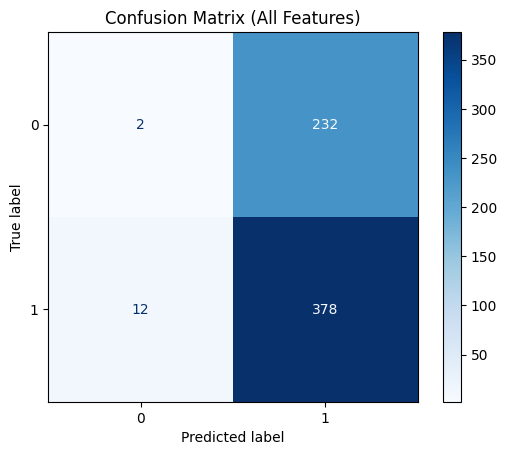

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_all = confusion_matrix(test_labels1, test_predictions2)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=['0', '1'])
disp_all.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (All Features)')
plt.show()

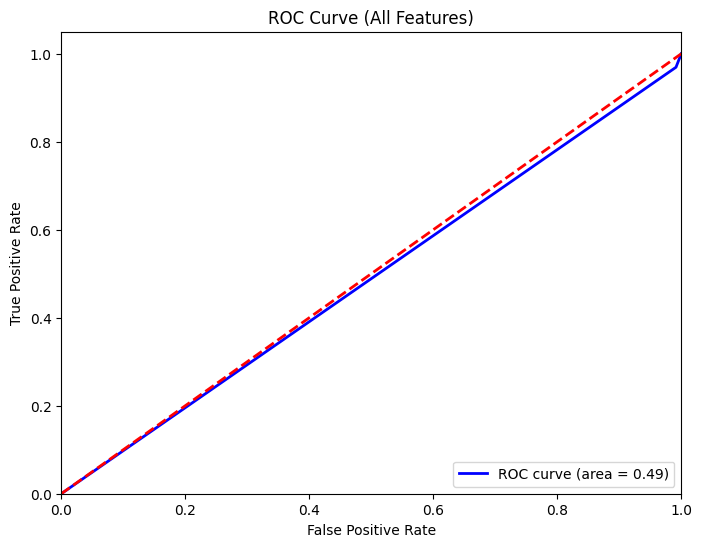

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# You have already computed these in your original code
# test_predictions_proba = gbm_model.predict(dtest)

# Calculate FPR, TPR, and thresholds using the predictions
fpr_all, tpr_all, thresholds_all = roc_curve(test_labels1, test_predictions2)
roc_auc_all = auc(fpr_all, tpr_all)

# Plot ROC curve for the model
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_all)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (All Features)')
plt.legend(loc="lower right")
plt.show()


In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
base_estimator = DecisionTreeClassifier(max_depth=3)

ada_boost = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

ada_boost.fit(train_features1, train_labels1)

test_predictions1 = ada_boost.predict(test_features1)

test_accuracy1 = accuracy_score(test_labels1, test_predictions1)
print("Test Accuracy:", test_accuracy1)
print(classification_report(test_labels1, test_predictions1))

Test Accuracy: 0.6266025641025641
              precision    recall  f1-score   support

           0       0.67      0.01      0.02       234
           1       0.63      1.00      0.77       390

    accuracy                           0.63       624
   macro avg       0.65      0.50      0.39       624
weighted avg       0.64      0.63      0.49       624



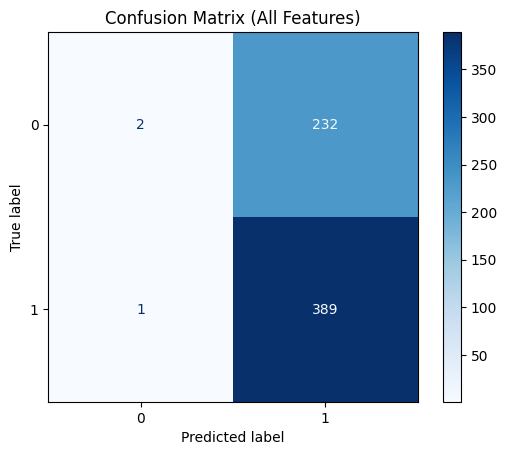

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_all = confusion_matrix(test_labels1, test_predictions1)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=['0', '1'])
disp_all.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (All Features)')
plt.show()

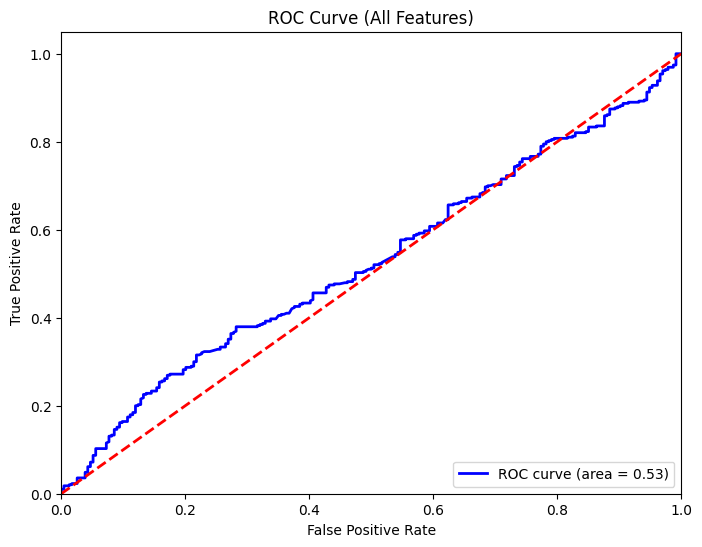

In [20]:
from sklearn.metrics import  roc_curve, auc

fpr_all, tpr_all, thresholds_all = roc_curve(test_labels1, ada_boost.decision_function(test_features1))
roc_auc_all = auc(fpr_all, tpr_all)

# Plot ROC curve for model with all features
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_all)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (All Features)')
plt.legend(loc="lower right")
plt.show()

In [33]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

cb_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss', 
    verbose=100
)

cb_model.fit(train_features1, train_labels1, verbose=True)

cb_model.save_model('catboost_model.bin')


0:	learn: 0.6682034	total: 409ms	remaining: 6m 48s
1:	learn: 0.6476388	total: 685ms	remaining: 5m 41s
2:	learn: 0.6315525	total: 957ms	remaining: 5m 18s
3:	learn: 0.6186608	total: 1.21s	remaining: 5m
4:	learn: 0.6082615	total: 1.46s	remaining: 4m 50s
5:	learn: 0.5997309	total: 1.71s	remaining: 4m 43s
6:	learn: 0.5928108	total: 1.98s	remaining: 4m 41s
7:	learn: 0.5869187	total: 2.24s	remaining: 4m 37s
8:	learn: 0.5825525	total: 2.5s	remaining: 4m 35s
9:	learn: 0.5782664	total: 2.76s	remaining: 4m 33s
10:	learn: 0.5738477	total: 3.03s	remaining: 4m 32s
11:	learn: 0.5708102	total: 3.28s	remaining: 4m 30s
12:	learn: 0.5675703	total: 3.53s	remaining: 4m 28s
13:	learn: 0.5654498	total: 3.79s	remaining: 4m 26s
14:	learn: 0.5633583	total: 4.04s	remaining: 4m 25s
15:	learn: 0.5616416	total: 4.29s	remaining: 4m 24s
16:	learn: 0.5590782	total: 4.55s	remaining: 4m 23s
17:	learn: 0.5570235	total: 4.81s	remaining: 4m 22s
18:	learn: 0.5554689	total: 5.07s	remaining: 4m 21s
19:	learn: 0.5539482	total:

In [36]:

test_predictions_proba2 = cb_model.predict_proba(test_features1)[:, 1] 
test_predictions3 = (test_predictions_proba2 > 0.4).astype(int)

test_accuracy2 = accuracy_score(test_labels1, test_predictions3)
print("Test Accuracy:", test_accuracy2)
print(classification_report(test_labels1, test_predictions3))

Test Accuracy: 0.6266025641025641
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       234
           1       0.63      1.00      0.77       390

    accuracy                           0.63       624
   macro avg       0.81      0.50      0.39       624
weighted avg       0.77      0.63      0.48       624



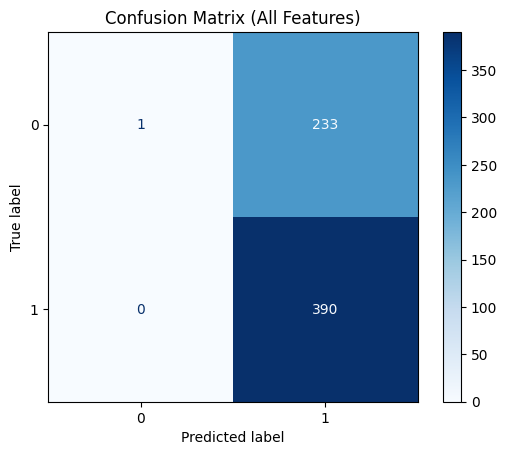

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_all = confusion_matrix(test_labels1, test_predictions3)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=['0', '1'])
disp_all.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (All Features)')
plt.show()

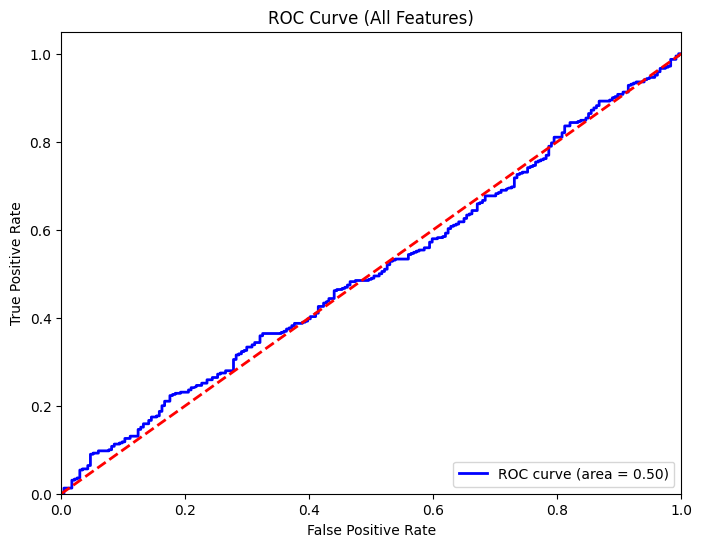

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr_all, tpr_all, thresholds_all = roc_curve(test_labels1, test_predictions_proba2)
roc_auc_all1 = auc(fpr_all, tpr_all)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_all1)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (All Features)')
plt.legend(loc="lower right")
plt.show()

In [43]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

dtrain = lgb.Dataset(train_features1, label=train_labels1)
dtest = lgb.Dataset(test_features1, label=test_labels1)

params = {
    'boosting_type': 'gbdt',     
    'objective': 'binary',        
    'metric': 'binary_logloss',  
    'learning_rate': 0.1,         
    'num_leaves': 25,             
    'max_depth': 6,              
    'subsample': 0.8,             
    'colsample_bytree': 0.8,      
    'n_estimators': 100,
    'is_unbalance': True          
}

callbacks = [lgb.early_stopping(stopping_rounds=10)]

gbm = lgb.train(params, dtrain, num_boost_round=100, valid_sets=[dtest], callbacks=callbacks)

test_predictions_proba = gbm.predict(test_features1, num_iteration=gbm.best_iteration)
test_predictions1 = (test_predictions_proba > 0.5).astype(int)

test_accuracy1 = accuracy_score(test_labels1, test_predictions1)
print(f"Test Accuracy: {test_accuracy1}")


[LightGBM] [Info] Number of positive: 3875, number of negative: 1341
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.141563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 519662
[LightGBM] [Info] Number of data points in the train set: 5216, number of used features: 2047
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.742906 -> initscore=1.061130
[LightGBM] [Info] Start training from score 1.061130
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare lists to store results
max_depths = range(1, 22)
train_accuracies4 = []
test_accuracies4 = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(train_features1, train_labels1)

    train_predictions4 = clf.predict(train_features1)
    test_predictions4 = clf.predict(test_features1)

    train_accuracy4 = accuracy_score(train_labels1, train_predictions4)
    test_accuracy4 = accuracy_score(test_labels1, test_predictions4)

    train_accuracies4.append(train_accuracy4)
    test_accuracies4.append(test_accuracy4)

    print(f"Max Depth: {depth}")
    print("Training Accuracy:", train_accuracy4)
    print("Testing Accuracy:", test_accuracy4)
    print()  


Max Depth: 1
Training Accuracy: 0.7429064417177914
Testing Accuracy: 0.625

Max Depth: 2
Training Accuracy: 0.7446319018404908
Testing Accuracy: 0.625

Max Depth: 3
Training Accuracy: 0.7450153374233128
Testing Accuracy: 0.625

Max Depth: 4
Training Accuracy: 0.7478911042944786
Testing Accuracy: 0.625

Max Depth: 5
Training Accuracy: 0.7511503067484663
Testing Accuracy: 0.625

Max Depth: 6
Training Accuracy: 0.7574769938650306
Testing Accuracy: 0.6233974358974359

Max Depth: 7
Training Accuracy: 0.7689800613496932
Testing Accuracy: 0.6185897435897436

Max Depth: 8
Training Accuracy: 0.7777990797546013
Testing Accuracy: 0.6185897435897436

Max Depth: 9
Training Accuracy: 0.7825920245398773
Testing Accuracy: 0.6217948717948718

Max Depth: 10
Training Accuracy: 0.7839340490797546
Testing Accuracy: 0.6201923076923077

Max Depth: 11
Training Accuracy: 0.7879601226993865
Testing Accuracy: 0.6201923076923077

Max Depth: 12
Training Accuracy: 0.7906441717791411
Testing Accuracy: 0.616987179487

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = DecisionTreeClassifier(max_depth=6)

clf.fit(train_features1, train_labels1)

train_predictions4 = clf.predict(train_features1)
test_predictions4 = clf.predict(test_features1)

train_accuracy4 = accuracy_score(train_labels1, train_predictions4)
test_accuracy4 = accuracy_score(test_labels1, test_predictions4)

print("Training Accuracy:", train_accuracy4)
print("Testing Accuracy:", test_accuracy4)

print("\nClassification Report (Test Data):")
print(classification_report(test_labels1, test_predictions4))


Training Accuracy: 0.7574769938650306
Testing Accuracy: 0.6233974358974359

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.33      0.00      0.01       234
           1       0.62      0.99      0.77       390

    accuracy                           0.62       624
   macro avg       0.48      0.50      0.39       624
weighted avg       0.52      0.62      0.48       624



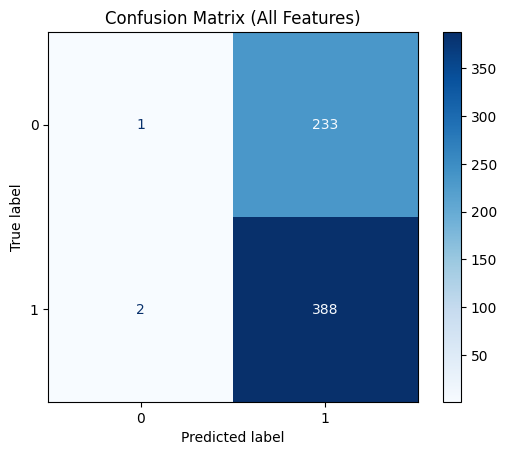

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_all = confusion_matrix(test_labels1, test_predictions4)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=['0', '1'])
disp_all.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (All Features)')
plt.show()

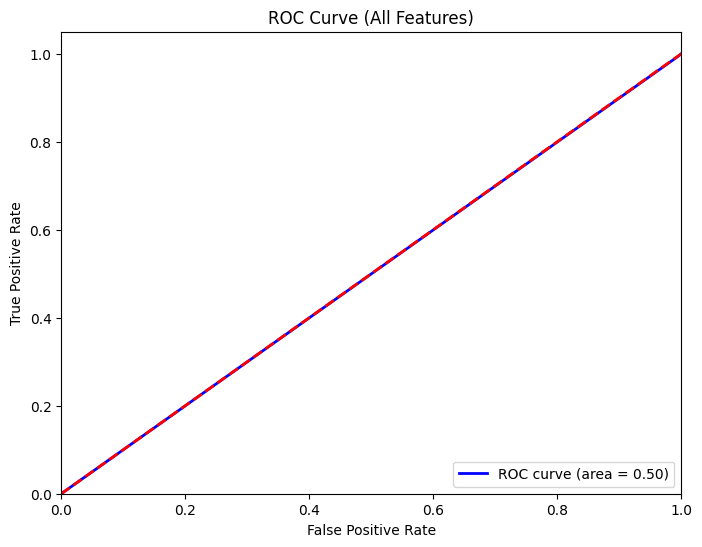

In [63]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr_all, tpr_all, thresholds_all = roc_curve(test_labels1, test_predictions4)
roc_auc_all1 = auc(fpr_all, tpr_all)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_all1)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (All Features)')
plt.legend(loc="lower right")
plt.show()

In [65]:
# import numpy as np
# from tensorflow import keras
# from tensorflow.keras import layers

# train_labels = keras.utils.to_categorical(train_set.classes, num_classes=2)
# test_labels = keras.utils.to_categorical(test_set.classes, num_classes=2)

# model = keras.Sequential([
#     layers.Input(shape=(train_features1.shape[1],)),  
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.9),
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.9),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(512, activation='relu'),
#     layers.Dense(2, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Implementing a callback for early stopping to avoid overfitting
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=10,
#     min_delta=0.001,
#     restore_best_weights=True,
# )

# model.fit(train_features1, train_labels, epochs=100, batch_size=32, verbose=1,  # Increased epochs and adjusted batch size
#           callbacks=[early_stopping])

# test_loss, test_acc = model.evaluate(test_features1, test_labels, verbose=1)
# print("Test accuracy:", test_acc)


In [67]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf_clf.fit(train_features1, train_labels1)
rf_predictions5 = rf_clf.predict(test_features1)
rf_accuracy5 = accuracy_score(test_labels1, rf_predictions5)
print("Random Forest Testing Accuracy:", rf_accuracy5)
print(classification_report(test_labels1, rf_predictions5))


Random Forest Testing Accuracy: 0.625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



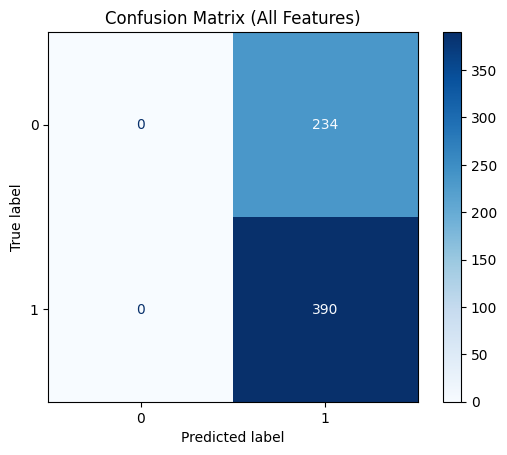

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_all = confusion_matrix(test_labels1, rf_predictions5)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=['0', '1'])
disp_all.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (All Features)')
plt.show()

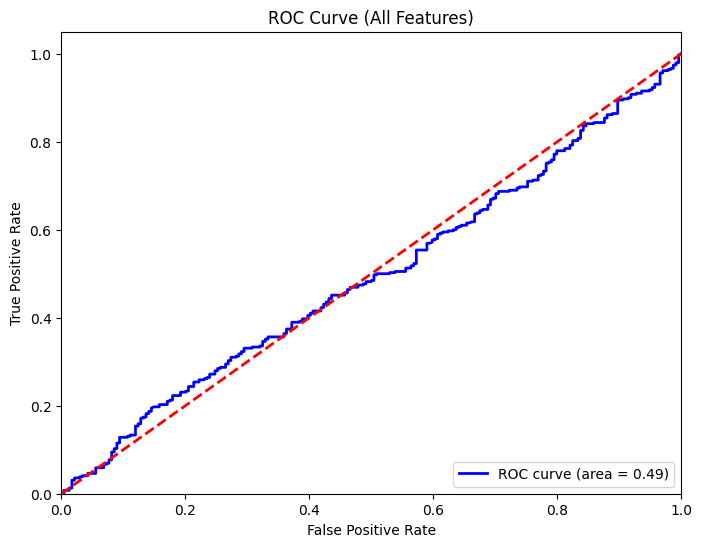

In [74]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probabilities = rf_clf.predict_proba(test_features1)[:, 1]

# Calculate ROC curve and AUC
fpr_all, tpr_all, thresholds_all = roc_curve(test_labels1, probabilities)
roc_auc_all4 = auc(fpr_all, tpr_all)

# Plot ROC curve for the model
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_all4)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (All Features)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.metrics import accuracy_score

# cb_model = CatBoostClassifier(
#     iterations=500,
#     learning_rate=0.1,
#     depth=6,
#     loss_function='Logloss', 
#     verbose=100
# )

# cb_model.fit(train_features, train_labels, verbose=True)

# cb_model.save_model('catboost_model.bin')

**ResNet-101**

In [6]:
from tensorflow.keras.applications.resnet import ResNet101
weights_path = '/kaggle/input/resnet-101/resnet101_weights_th.h5'

base_model12 = ResNet101(weights=None,        
                      input_shape=(224, 224, 3),  
                      pooling="max",         
                      include_top=False)     

base_model12.load_weights(weights_path, by_name=True)

for layer in base_model12.layers:
    layer.trainable = False



In [8]:
train_features2 = base_model12.predict(train_set, verbose=1)
train_labels2 = train_set.classes  

326/326 ━━━━━━━━━━━━━━━━━━━━ 158s 484ms/step


In [9]:
test_features2 = base_model12.predict(test_set, verbose=1)
test_labels2 = test_set.classes  

39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step


In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

base_estimator = DecisionTreeClassifier(max_depth=3)

ada_boost = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

ada_boost.fit(train_features2, train_labels2)

test_predictions2 = ada_boost.predict(test_features2)

test_accuracy2 = accuracy_score(test_labels2, test_predictions2)
print("Test Accuracy:", test_accuracy2)


Test Accuracy: 0.6282051282051282


In [17]:
print(classification_report(test_labels2, test_predictions2))

              precision    recall  f1-score   support

           0       0.56      0.04      0.07       234
           1       0.63      0.98      0.77       390

    accuracy                           0.63       624
   macro avg       0.60      0.51      0.42       624
weighted avg       0.60      0.63      0.51       624



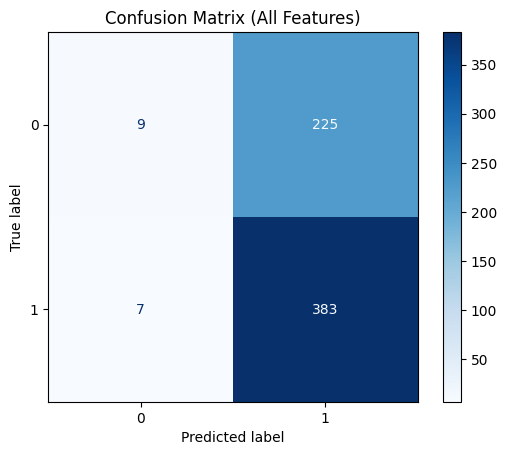

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_all = confusion_matrix(test_labels2, test_predictions2)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=['0', '1'])
disp_all.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (All Features)')
plt.show()

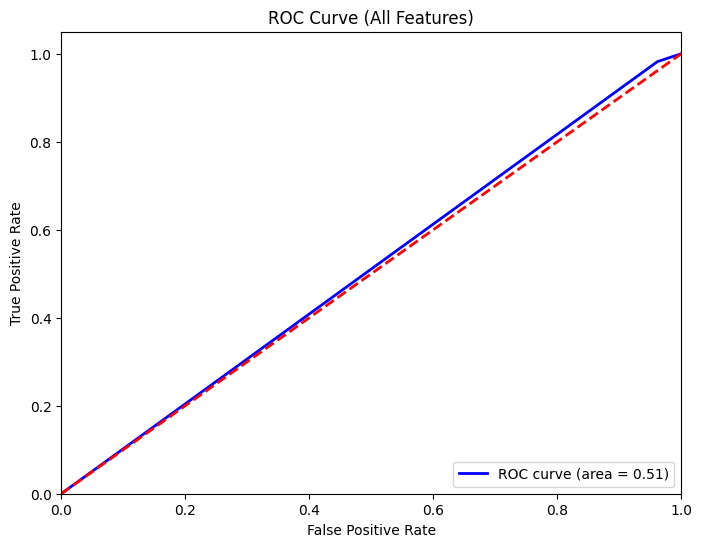

In [19]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr_all, tpr_all, thresholds_all = roc_curve(test_labels2, test_predictions2)
roc_auc_all1 = auc(fpr_all, tpr_all)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_all1)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (All Features)')
plt.legend(loc="lower right")
plt.show()

In [20]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

dtrain = xgb.DMatrix(train_features2, label=train_labels2)
dtest = xgb.DMatrix(test_features2)

params = {
    'objective': 'binary:logistic',  
    'booster': 'gbtree',
    'eval_metric': 'logloss',
    'eta': 0.1, 
    'max_depth': 6,  
    'subsample': 0.8,  
    'colsample_bytree': 0.8,  
    'n_estimators': 100 
}

num_rounds = 100
gbm_model = xgb.train(params, dtrain, num_boost_round=num_rounds)

test_predictions_proba = gbm_model.predict(dtest)
test_predictions3 = (test_predictions_proba > 0.5).astype(int)

test_accuracy3 = accuracy_score(test_labels2, test_predictions3)
test_accuracy3


0.6169871794871795

In [21]:
print(classification_report(test_labels2, test_predictions3))

              precision    recall  f1-score   support

           0       0.27      0.01      0.02       234
           1       0.62      0.98      0.76       390

    accuracy                           0.62       624
   macro avg       0.45      0.50      0.39       624
weighted avg       0.49      0.62      0.49       624



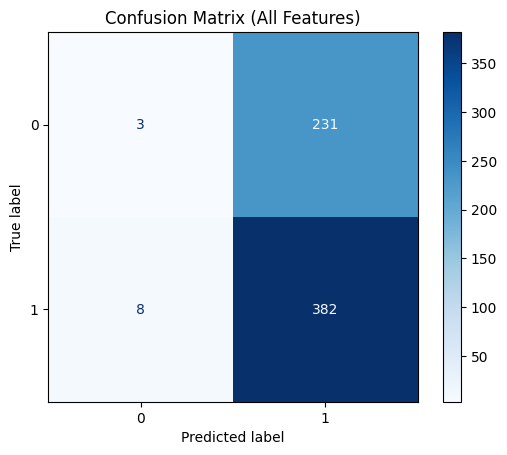

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_all = confusion_matrix(test_labels2, test_predictions3)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=['0', '1'])
disp_all.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (All Features)')
plt.show()

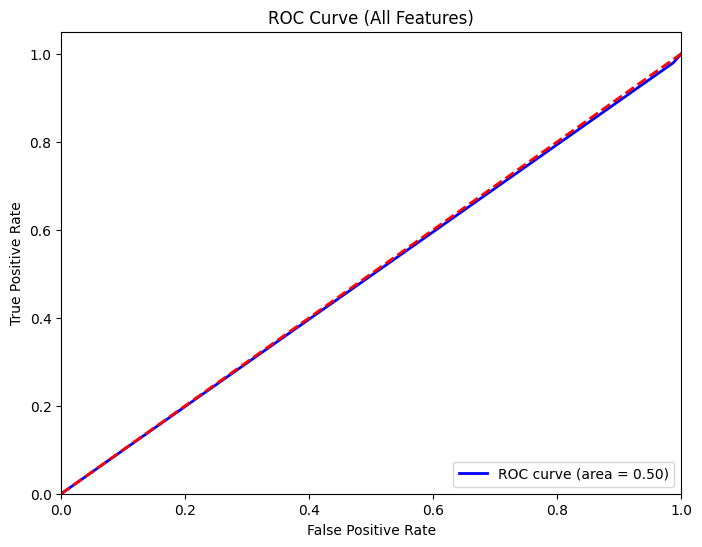

In [23]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr_all, tpr_all, thresholds_all = roc_curve(test_labels2, test_predictions3)
roc_auc_all1 = auc(fpr_all, tpr_all)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_all1)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (All Features)')
plt.legend(loc="lower right")
plt.show()

In [24]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

cb_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss', 
    verbose=100
)

cb_model.fit(train_features2, train_labels2, verbose=True)

cb_model.save_model('catboost_model.bin')


0:	learn: 0.6682965	total: 473ms	remaining: 7m 52s
1:	learn: 0.6478637	total: 791ms	remaining: 6m 34s
2:	learn: 0.6317944	total: 1.09s	remaining: 6m 3s
3:	learn: 0.6188885	total: 1.4s	remaining: 5m 48s
4:	learn: 0.6086226	total: 1.7s	remaining: 5m 39s
5:	learn: 0.5994653	total: 2.02s	remaining: 5m 33s
6:	learn: 0.5926222	total: 2.32s	remaining: 5m 29s
7:	learn: 0.5869588	total: 2.61s	remaining: 5m 23s
8:	learn: 0.5823382	total: 2.91s	remaining: 5m 20s
9:	learn: 0.5778178	total: 3.21s	remaining: 5m 18s
10:	learn: 0.5744724	total: 3.52s	remaining: 5m 16s
11:	learn: 0.5708121	total: 3.83s	remaining: 5m 15s
12:	learn: 0.5684490	total: 4.14s	remaining: 5m 14s
13:	learn: 0.5666315	total: 4.46s	remaining: 5m 13s
14:	learn: 0.5643398	total: 4.77s	remaining: 5m 13s
15:	learn: 0.5625128	total: 5.09s	remaining: 5m 12s
16:	learn: 0.5610490	total: 5.4s	remaining: 5m 12s
17:	learn: 0.5598100	total: 5.69s	remaining: 5m 10s
18:	learn: 0.5579752	total: 5.98s	remaining: 5m 8s
19:	learn: 0.5570495	total:

In [25]:
test_predictions_proba1 = cb_model.predict_proba(test_features2)[:, 1] 
test_predictions4 = (test_predictions_proba1 > 0.5).astype(int)

test_accuracy4 = accuracy_score(test_labels2, test_predictions4)
print("Test Accuracy:", test_accuracy2)
print(classification_report(test_labels2, test_predictions4))

Test Accuracy: 0.6282051282051282
              precision    recall  f1-score   support

           0       0.40      0.03      0.06       234
           1       0.63      0.97      0.76       390

    accuracy                           0.62       624
   macro avg       0.51      0.50      0.41       624
weighted avg       0.54      0.62      0.50       624



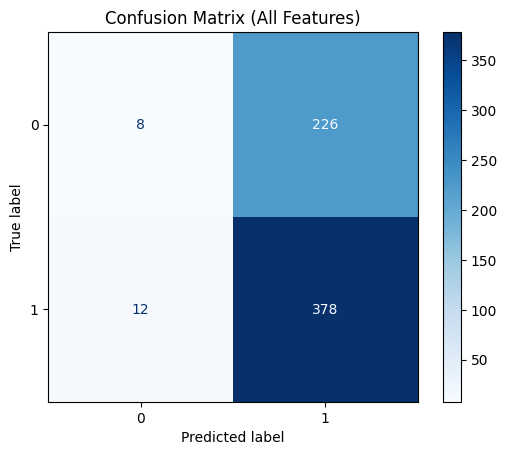

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_all = confusion_matrix(test_labels2, test_predictions4)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=['0', '1'])
disp_all.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (All Features)')
plt.show()

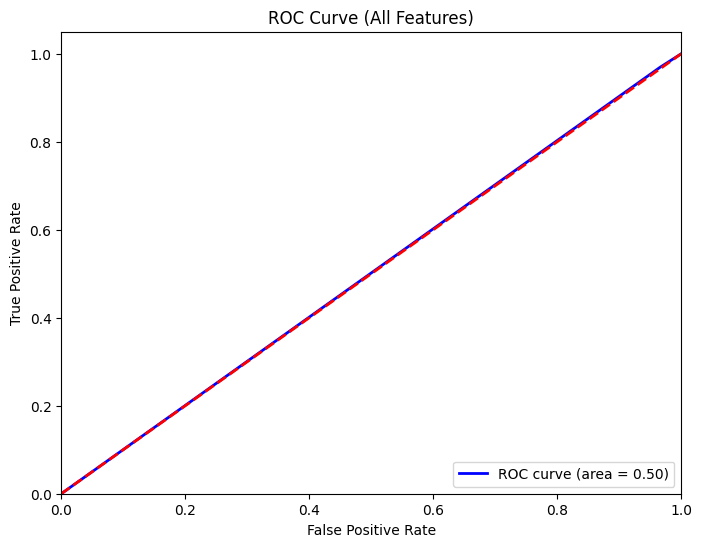

In [27]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr_all, tpr_all, thresholds_all = roc_curve(test_labels2, test_predictions4)
roc_auc_all1 = auc(fpr_all, tpr_all)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_all1)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (All Features)')
plt.legend(loc="lower right")
plt.show()

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare lists to store results
max_depths = range(1, 22)
train_accuracies2 = []
test_accuracies2 = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(train_features2, train_labels2)

    train_predictions2 = clf.predict(train_features2)
    test_predictions2 = clf.predict(test_features2)

    train_accuracy2 = accuracy_score(train_labels2, train_predictions2)
    test_accuracy2 = accuracy_score(test_labels2, test_predictions2)

    train_accuracies2.append(train_accuracy2)
    test_accuracies2.append(test_accuracy2)

    print(f"Max Depth: {depth}")
    print("Training Accuracy:", train_accuracy2)
    print("Testing Accuracy:", test_accuracy2)
    print()  # Adds an empty line for better readability between results


Max Depth: 1
Training Accuracy: 0.7444401840490797
Testing Accuracy: 0.625

Max Depth: 2
Training Accuracy: 0.7465490797546013
Testing Accuracy: 0.625

Max Depth: 3
Training Accuracy: 0.7467407975460123
Testing Accuracy: 0.625

Max Depth: 4
Training Accuracy: 0.7486579754601227
Testing Accuracy: 0.625

Max Depth: 5
Training Accuracy: 0.7513420245398773
Testing Accuracy: 0.625

Max Depth: 6
Training Accuracy: 0.754409509202454
Testing Accuracy: 0.625

Max Depth: 7
Training Accuracy: 0.7599693251533742
Testing Accuracy: 0.625

Max Depth: 8
Training Accuracy: 0.7659125766871165
Testing Accuracy: 0.625

Max Depth: 9
Training Accuracy: 0.7685966257668712
Testing Accuracy: 0.625

Max Depth: 10
Training Accuracy: 0.7701303680981595
Testing Accuracy: 0.625

Max Depth: 11
Training Accuracy: 0.7737730061349694
Testing Accuracy: 0.625

Max Depth: 12
Training Accuracy: 0.7777990797546013
Testing Accuracy: 0.6233974358974359

Max Depth: 13
Training Accuracy: 0.7852760736196319
Testing Accuracy: 0.6

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = DecisionTreeClassifier(max_depth=15)

clf.fit(train_features2, train_labels2)

train_predictions5 = clf.predict(train_features2)
test_predictions5 = clf.predict(test_features2)

train_accuracy5 = accuracy_score(train_labels2, train_predictions5)
test_accuracy5 = accuracy_score(test_labels2, test_predictions5)

print("Training Accuracy:", train_accuracy5)
print("Testing Accuracy:", test_accuracy5)

print("\nClassification Report (Test Data):")
print(classification_report(test_labels2, test_predictions5))

Training Accuracy: 0.8025306748466258
Testing Accuracy: 0.6330128205128205

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.73      0.03      0.07       234
           1       0.63      0.99      0.77       390

    accuracy                           0.63       624
   macro avg       0.68      0.51      0.42       624
weighted avg       0.67      0.63      0.51       624



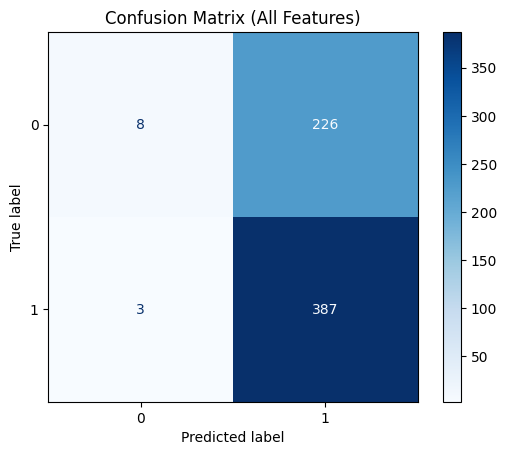

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_all = confusion_matrix(test_labels2, test_predictions5)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=['0', '1'])
disp_all.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (All Features)')
plt.show()

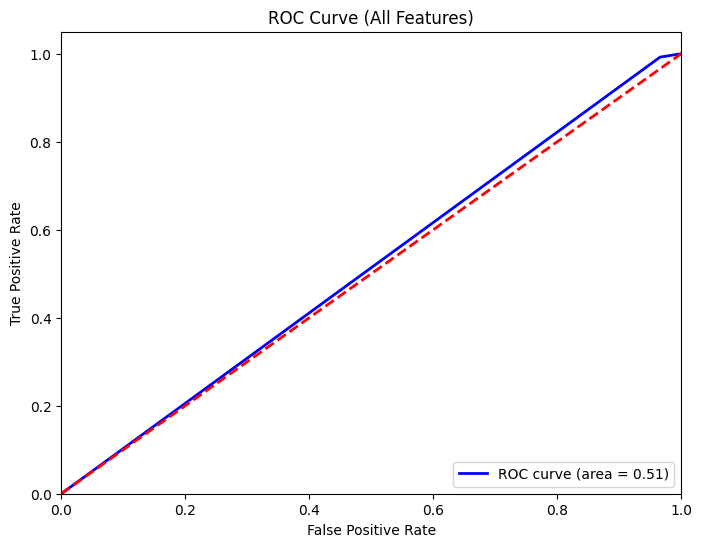

In [32]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr_all, tpr_all, thresholds_all = roc_curve(test_labels2, test_predictions5)
roc_auc_all1 = auc(fpr_all, tpr_all)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_all1)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (All Features)')
plt.legend(loc="lower right")
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf_clf.fit(train_features2, train_labels2)
rf_predictions6 = rf_clf.predict(test_features2)
rf_accuracy6 = accuracy_score(test_labels2, rf_predictions6)
print("Random Forest Testing Accuracy:", rf_accuracy6)
print(classification_report(test_labels2, rf_predictions6))

Random Forest Testing Accuracy: 0.625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



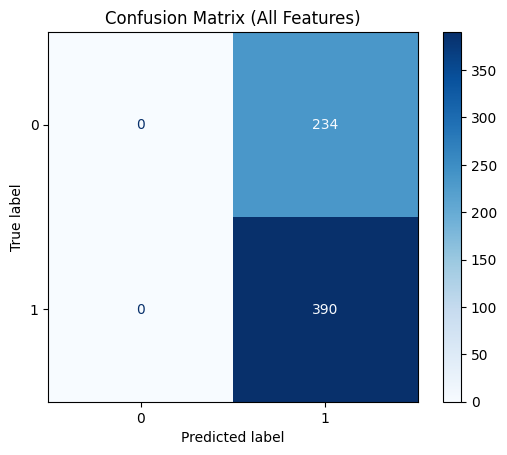

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_all = confusion_matrix(test_labels2, rf_predictions6)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=['0', '1'])
disp_all.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (All Features)')
plt.show()

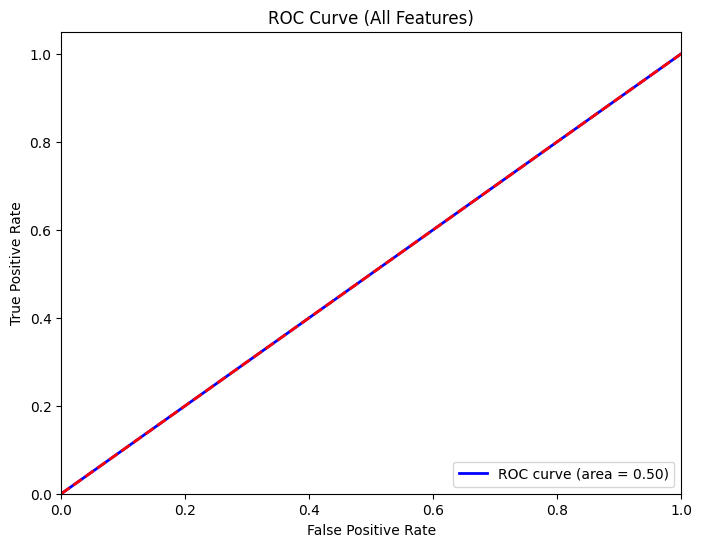

In [35]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr_all, tpr_all, thresholds_all = roc_curve(test_labels2, rf_predictions6)
roc_auc_all1 = auc(fpr_all, tpr_all)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_all1)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (All Features)')
plt.legend(loc="lower right")
plt.show()

In [83]:
# import numpy as np
# from tensorflow import keras
# from tensorflow.keras import layers

# train_labels = keras.utils.to_categorical(train_set.classes, num_classes=2)
# test_labels = keras.utils.to_categorical(test_set.classes, num_classes=2)

# model = keras.Sequential([
#     layers.Input(shape=(train_features2.shape[1],)),  
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(2, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Implementing a callback for early stopping to avoid overfitting
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=10,
#     min_delta=0.001,
#     restore_best_weights=True,
# )

# model.fit(train_features2, train_labels, epochs=50, batch_size=32, verbose=1,  # Increased epochs and adjusted batch size
#           callbacks=[early_stopping])

# test_loss, test_acc = model.evaluate(test_features2, test_labels, verbose=1)
# print("Test accuracy:", test_acc)


In [143]:
# import lightgbm as lgb
# from sklearn.metrics import accuracy_score

# dtrain = lgb.Dataset(train_features2, label=train_labels2)
# dtest = lgb.Dataset(test_features2, label=test_labels2)

# params = {
#     'boosting_type': 'gbdt',     
#     'objective': 'binary',        
#     'metric': 'binary_logloss',  
#     'learning_rate': 0.1,         
#     'num_leaves': 25,             
#     'max_depth': 6,              
#     'subsample': 0.8,             
#     'colsample_bytree': 0.8,      
#     'n_estimators': 100,
#     'is_unbalance': True          
# }

# callbacks = [lgb.early_stopping(stopping_rounds=10)]

# gbm = lgb.train(params, dtrain, num_boost_round=100, valid_sets=[dtest], callbacks=callbacks)

# test_predictions_proba = gbm.predict(test_features2, num_iteration=gbm.best_iteration)
# test_predictions2 = (test_predictions_proba > 0.6).astype(int)

# test_accuracy2 = accuracy_score(test_labels2, test_predictions2)
# print(f"Test Accuracy: {test_accuracy2}")


**VGG-16**

In [75]:
from tensorflow.keras.applications import VGG16
weights_path = '/kaggle/input/vgg-16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model_vgg13 = VGG16(weights=None,                
                         input_shape=(224, 224, 3),  
                         pooling="max",               
                         include_top=False)          

base_model_vgg13.load_weights(weights_path)

for layer in base_model_vgg13.layers:
    layer.trainable = False



In [77]:
train_features13 = base_model_vgg13.predict(train_set, verbose=1)
train_labels13 = train_set.classes  

326/326 ━━━━━━━━━━━━━━━━━━━━ 103s 316ms/step


In [78]:
test_features13 = base_model_vgg13.predict(test_set, verbose=1)
test_labels13 = test_set.classes

39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step


In [79]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

dtrain = xgb.DMatrix(train_features13, label=train_labels13)
dtest = xgb.DMatrix(test_features13)

params = {
    'objective': 'binary:logistic',  
    'booster': 'gbtree',
    'eval_metric': 'logloss',
    'eta': 0.1, 
    'max_depth': 6,  
    'subsample': 0.8,  
    'colsample_bytree': 0.8,  
    'n_estimators': 100 
}

num_rounds = 100
gbm_model = xgb.train(params, dtrain, num_boost_round=num_rounds)

test_predictions_proba = gbm_model.predict(dtest)
test_predictions13 = (test_predictions_proba > 0.5).astype(int)

test_accuracy13 = accuracy_score(test_labels13, test_predictions13)
test_accuracy13


0.6217948717948718

In [82]:
print(classification_report(test_labels13, test_predictions13))

              precision    recall  f1-score   support

           0       0.25      0.00      0.01       234
           1       0.62      0.99      0.77       390

    accuracy                           0.62       624
   macro avg       0.44      0.50      0.39       624
weighted avg       0.48      0.62      0.48       624



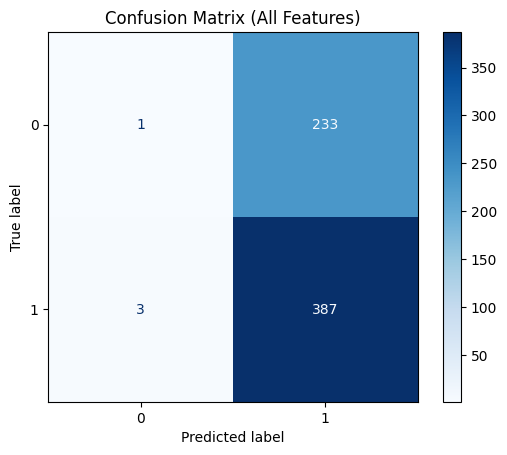

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_all = confusion_matrix(test_labels13, test_predictions13)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=['0', '1'])
disp_all.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (All Features)')
plt.show()

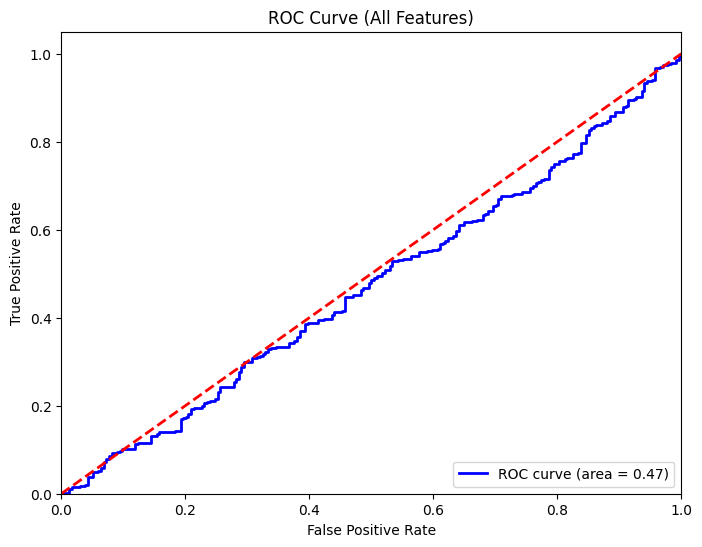

In [101]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# probabilities = rf_clf.predict_proba(test_features13)[:, 1]

# Calculate ROC curve and AUC
fpr_all, tpr_all, thresholds_all = roc_curve(test_labels13, test_predictions_proba)
roc_auc_all13 = auc(fpr_all, tpr_all)

# Plot ROC curve for the model
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_all13)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (All Features)')
plt.legend(loc="lower right")
plt.show()

In [112]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming train_features, train_labels, test_features, test_labels are already defined

# Define the base estimator
# We use a Decision Tree with max_depth=6, similar to the 'max_depth' used in your XGBoost example
base_estimator = DecisionTreeClassifier(max_depth=12)

# Create the AdaBoost classifier
# n_estimators corresponds to num_boost_rounds in your XGBoost code
# Learning rate 'eta' in XGBoost is similar to 'learning_rate' in AdaBoost
ada_boost = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Fit the model on the training data
ada_boost.fit(train_features13, train_labels13)

# Predict the test set
test_predictions14 = ada_boost.predict(test_features13)

# Calculate the accuracy of the model
test_accuracy14 = accuracy_score(test_labels13, test_predictions14)
print("Test Accuracy:", test_accuracy14)


Test Accuracy: 0.6282051282051282


In [113]:
print(classification_report(test_labels13, test_predictions14))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       234
           1       0.63      1.00      0.77       390

    accuracy                           0.63       624
   macro avg       0.81      0.50      0.39       624
weighted avg       0.77      0.63      0.49       624



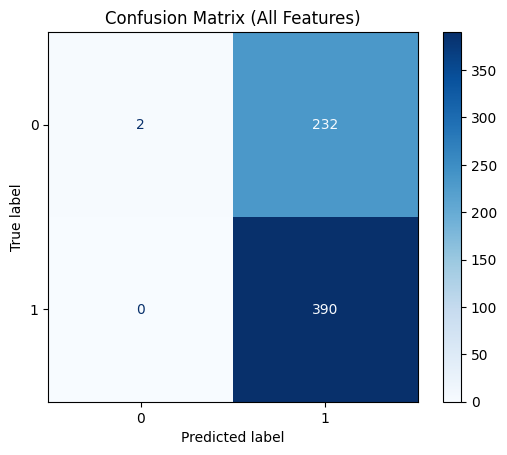

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_all = confusion_matrix(test_labels13, test_predictions14)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=['0', '1'])
disp_all.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (All Features)')
plt.show()

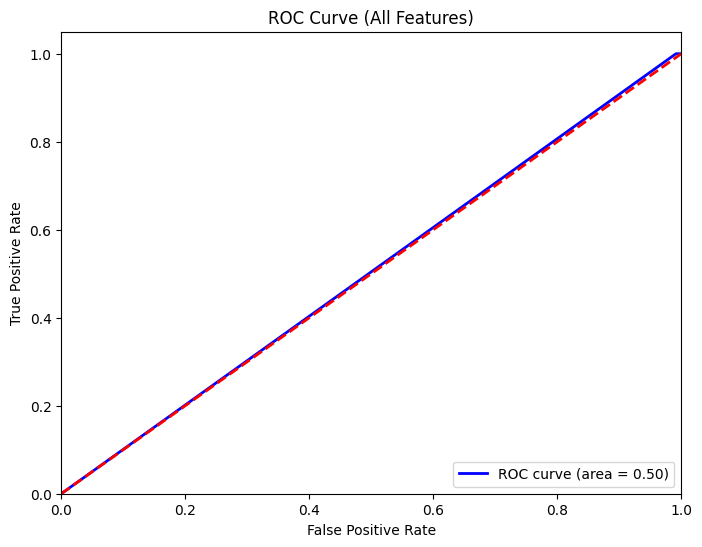

In [116]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# probabilities = rf_clf.predict_proba(test_features1)[:, 1]

# Calculate ROC curve and AUC
fpr_all, tpr_all, thresholds_all = roc_curve(test_labels13, test_predictions14)
roc_auc_all14 = auc(fpr_all, tpr_all)

# Plot ROC curve for the model
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_all14)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (All Features)')
plt.legend(loc="lower right")
plt.show()

In [118]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

cb_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss', 
    verbose=100
)

cb_model.fit(train_features13, train_labels13, verbose=True)

cb_model.save_model('catboost_model.bin')

test_predictions_proba15 = cb_model.predict_proba(test_features13)[:, 1] 
test_predictions15 = (test_predictions_proba15 > 0.5).astype(int)

test_accuracy15 = accuracy_score(test_labels13, test_predictions15)
print("Test Accuracy:", test_accuracy15)

0:	learn: 0.6667807	total: 88.4ms	remaining: 1m 28s
1:	learn: 0.6461684	total: 149ms	remaining: 1m 14s
2:	learn: 0.6297625	total: 210ms	remaining: 1m 9s
3:	learn: 0.6166501	total: 269ms	remaining: 1m 6s
4:	learn: 0.6050033	total: 335ms	remaining: 1m 6s
5:	learn: 0.5953327	total: 401ms	remaining: 1m 6s
6:	learn: 0.5874095	total: 461ms	remaining: 1m 5s
7:	learn: 0.5814620	total: 521ms	remaining: 1m 4s
8:	learn: 0.5762190	total: 582ms	remaining: 1m 4s
9:	learn: 0.5718848	total: 639ms	remaining: 1m 3s
10:	learn: 0.5679812	total: 698ms	remaining: 1m 2s
11:	learn: 0.5644488	total: 759ms	remaining: 1m 2s
12:	learn: 0.5614432	total: 822ms	remaining: 1m 2s
13:	learn: 0.5586421	total: 884ms	remaining: 1m 2s
14:	learn: 0.5562909	total: 948ms	remaining: 1m 2s
15:	learn: 0.5541430	total: 1.01s	remaining: 1m 2s
16:	learn: 0.5515955	total: 1.07s	remaining: 1m 1s
17:	learn: 0.5496460	total: 1.13s	remaining: 1m 1s
18:	learn: 0.5479160	total: 1.2s	remaining: 1m 1s
19:	learn: 0.5467558	total: 1.25s	remai

In [119]:
print(classification_report(test_labels13, test_predictions15))

              precision    recall  f1-score   support

           0       0.25      0.00      0.01       234
           1       0.62      0.99      0.77       390

    accuracy                           0.62       624
   macro avg       0.44      0.50      0.39       624
weighted avg       0.48      0.62      0.48       624



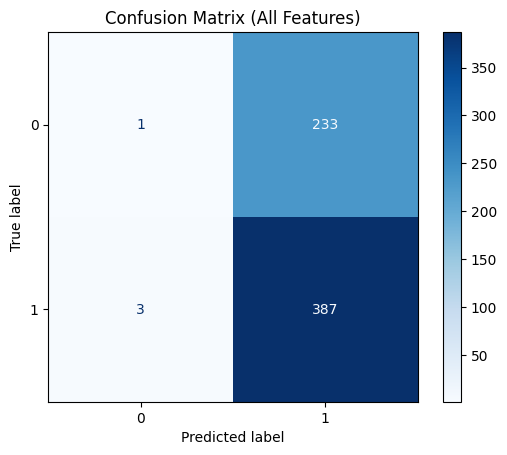

In [120]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_all = confusion_matrix(test_labels13, test_predictions15)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=['0', '1'])
disp_all.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (All Features)')
plt.show()

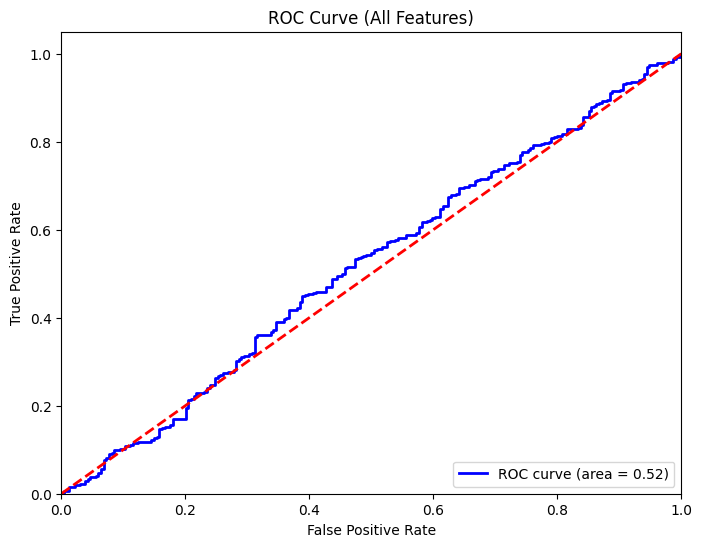

In [123]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probabilities = cb_model.predict_proba(test_features13)[:, 1]

# Calculate ROC curve and AUC
fpr_all, tpr_all, thresholds_all = roc_curve(test_labels13, probabilities)
roc_auc_all15 = auc(fpr_all, tpr_all)

# Plot ROC curve for the model
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_all15)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (All Features)')
plt.legend(loc="lower right")
plt.show()

In [142]:
# import lightgbm as lgb
# from sklearn.metrics import accuracy_score

# dtrain = lgb.Dataset(train_features13, label=train_labels13)
# dtest = lgb.Dataset(test_features13, label=test_labels13)

# params = {
#     'boosting_type': 'gbdt',     
#     'objective': 'binary',        
#     'metric': 'binary_logloss',  
#     'learning_rate': 0.1,         
#     'num_leaves': 25,             
#     'max_depth': 6,              
#     'subsample': 0.8,             
#     'colsample_bytree': 0.8,      
#     'n_estimators': 100,
#     'is_unbalance': True          
# }

# callbacks = [lgb.early_stopping(stopping_rounds=10)]

# gbm = lgb.train(params, dtrain, num_boost_round=100, valid_sets=[dtest], callbacks=callbacks)

# test_predictions_proba = gbm.predict(test_features13, num_iteration=gbm.best_iteration)
# test_predictions13 = (test_predictions_proba > 0.5).astype(int)

# test_accuracy13 = accuracy_score(test_labels13, test_predictions13)
# print(f"Test Accuracy: {test_accuracy13}")


In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

max_depths = range(1, 22)
train_accuracies16 = []
test_accuracies16 = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(train_features13, train_labels13)

    train_predictions16 = clf.predict(train_features13)
    test_predictions16 = clf.predict(test_features13)

    train_accuracy16 = accuracy_score(train_labels13, train_predictions16)
    test_accuracy16 = accuracy_score(test_labels13, test_predictions16)

    train_accuracies16.append(train_accuracy16)
    test_accuracies16.append(test_accuracy16)

    print(f"Max Depth: {depth}")
    print("Training Accuracy:", train_accuracy16)
    print("Testing Accuracy:", test_accuracy16)
    print()  


Max Depth: 1
Training Accuracy: 0.7429064417177914
Testing Accuracy: 0.625

Max Depth: 2
Training Accuracy: 0.7438650306748467
Testing Accuracy: 0.625

Max Depth: 3
Training Accuracy: 0.745590490797546
Testing Accuracy: 0.625

Max Depth: 4
Training Accuracy: 0.7523006134969326
Testing Accuracy: 0.6217948717948718

Max Depth: 5
Training Accuracy: 0.759010736196319
Testing Accuracy: 0.6201923076923077

Max Depth: 6
Training Accuracy: 0.7626533742331288
Testing Accuracy: 0.6233974358974359

Max Depth: 7
Training Accuracy: 0.7653374233128835
Testing Accuracy: 0.6185897435897436

Max Depth: 8
Training Accuracy: 0.7760736196319018
Testing Accuracy: 0.6073717948717948

Max Depth: 9
Training Accuracy: 0.7891104294478528
Testing Accuracy: 0.5897435897435898

Max Depth: 10
Training Accuracy: 0.8059815950920245
Testing Accuracy: 0.6105769230769231

Max Depth: 11
Training Accuracy: 0.8188266871165644
Testing Accuracy: 0.5897435897435898

Max Depth: 12
Training Accuracy: 0.83454754601227
Testing Ac

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = DecisionTreeClassifier(max_depth=6)

clf.fit(train_features13, train_labels13)

train_predictions17 = clf.predict(train_features13)
test_predictions17 = clf.predict(test_features13)

train_accuracy17 = accuracy_score(train_labels13, train_predictions17)
test_accuracy17 = accuracy_score(test_labels13, test_predictions17)

print("Training Accuracy:", train_accuracy17)
print("Testing Accuracy:", test_accuracy17)

print("\nClassification Report (Test Data):")
print(classification_report(test_labels13, test_predictions17))

Training Accuracy: 0.7626533742331288
Testing Accuracy: 0.6233974358974359

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.40      0.01      0.02       234
           1       0.63      0.99      0.77       390

    accuracy                           0.62       624
   macro avg       0.51      0.50      0.39       624
weighted avg       0.54      0.62      0.49       624



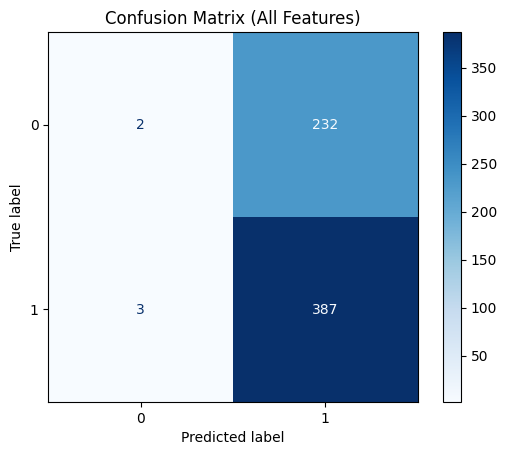

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_all = confusion_matrix(test_labels13, test_predictions17)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=['0', '1'])
disp_all.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (All Features)')
plt.show()

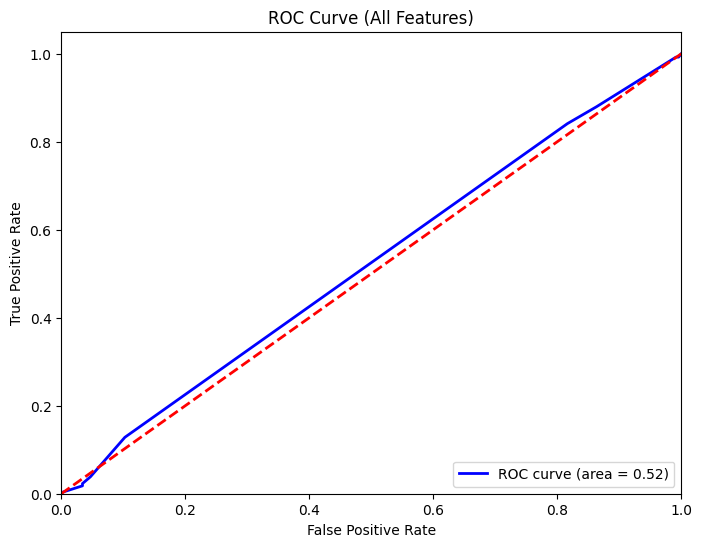

In [130]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probabilities = clf.predict_proba(test_features13)[:, 1]

# Calculate ROC curve and AUC
fpr_all, tpr_all, thresholds_all = roc_curve(test_labels13, probabilities)
roc_auc_all15 = auc(fpr_all, tpr_all)

# Plot ROC curve for the model
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_all15)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (All Features)')
plt.legend(loc="lower right")
plt.show()

In [135]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=21, random_state=42)
rf_clf.fit(train_features13, train_labels13)
rf_predictions18 = rf_clf.predict(test_features13)
rf_accuracy18 = accuracy_score(test_labels13, rf_predictions18)
print("Random Forest Testing Accuracy:", rf_accuracy18)


Random Forest Testing Accuracy: 0.625


In [138]:
print(classification_report(test_labels13, rf_predictions18))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



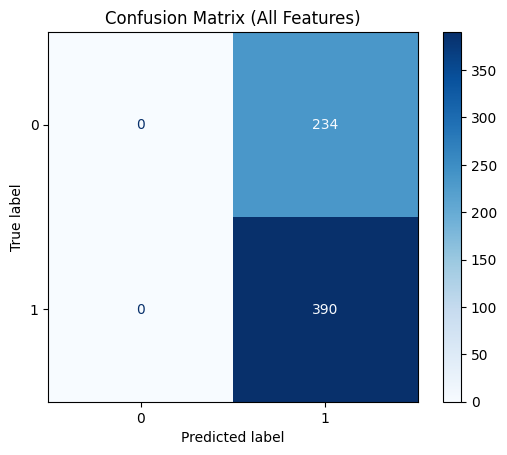

In [139]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_all = confusion_matrix(test_labels13, rf_predictions18)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=['0', '1'])
disp_all.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (All Features)')
plt.show()

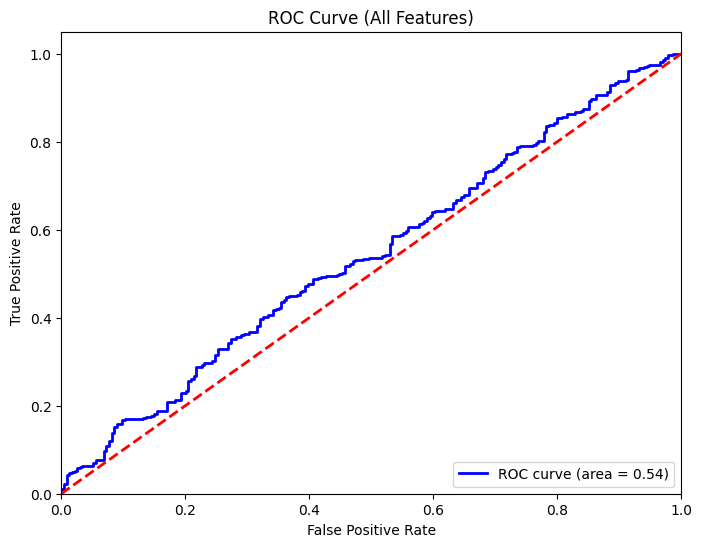

In [140]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probabilities = rf_clf.predict_proba(test_features13)[:, 1]

# Calculate ROC curve and AUC
fpr_all, tpr_all, thresholds_all = roc_curve(test_labels13, probabilities)
roc_auc_all15 = auc(fpr_all, tpr_all)

# Plot ROC curve for the model
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_all15)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (All Features)')
plt.legend(loc="lower right")
plt.show()

In [141]:
# import numpy as np
# from tensorflow import keras
# from tensorflow.keras import layers

# train_labels = keras.utils.to_categorical(train_set.classes, num_classes=2)
# test_labels = keras.utils.to_categorical(test_set.classes, num_classes=2)

# model = keras.Sequential([
#     layers.Input(shape=(train_features13.shape[1],)),  
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(2, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Implementing a callback for early stopping to avoid overfitting
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=10,
#     min_delta=0.001,
#     restore_best_weights=True,
# )

# model.fit(train_features13, train_labels, epochs=50, batch_size=32, verbose=1,  # Increased epochs and adjusted batch size
#           callbacks=[early_stopping])

# test_loss, test_acc = model.evaluate(test_features13, test_labels, verbose=1)
# print("Test accuracy:", test_acc)
